In [1]:
from sys import path as syspath
from pathlib import Path

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
import seaborn as sns

**Table of contents**<a id='toc0_'></a>    
- [Loading the Data](#toc1_)    
  - [Adding a structure to the database](#toc1_1_)    
- [Loading the Reflectivity Data](#toc2_)    
- [Constructing the Multi Energy Fitting Model](#toc3_)    
  - [eV Fitting](#toc3_1_)    
- [Trying to Renormalization](#toc4_)    
- [Trying individual polarization fitting](#toc5_)    
- [C60 Bilayer](#toc6_)    
- [Multi Energy Fitting](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Loading the Data](#toc0_)

Luckily, most data has been processed allready, and can be loaded using the `csv_to_refl` function. This function facilitates the loading of csv files and returns a reflectdataset object. 

In [2]:
db = rf.db()
print(db)
print(db.nexafs)
print(db.ocs)
print(db.refl)
print(db.struct)

pyref.db(C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db)
C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.data\nexafs
C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.ocs
C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.data\refl
C:\Users\hduva\Washington State University (email.wsu.edu)\Carbon Lab Research Group - Documents\Harlan Heilman\.refl\.db\.struct


There are three samples that we want to analyze. 
1. Bare Silicon
2. Room Temperature deposited ZnPc
3. C60 | ZnPc Bilayer

To check that each sample has the necesary data, we can use the 'db.query' function. This function allows us to query the database for a specific sample. The function returns a list of all the samples that match the query.


In [3]:
db.query("C60")
db.query("C32H16N8Zn")
db.query("Si")

NEXAFS data located for C60. ✨

Optical constant model located for C60. ✨

Structures located for C60. ✨

{
    'C60_ZnPc_bilayer': {
        'layers': ['vacuum', 'C60', 'C32H16N8Zn', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C60': {'thickness': 50, 'roughness': 1, 'density': 1.65},
        'C32H16N8Zn': {'thickness': 200, 'roughness': 10, 'density': 1.6},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 1.5, 'thickness': 0}
    }
}

NEXAFS data located for C32H16N8Zn. ✨

Optical constant model located for C32H16N8Zn. ✨

Structures located for C32H16N8Zn. ✨

{
    'ZnPc_RoomTemp': {
        'comments': [
            'Layers must be in the order from top to bottom, as they wil be stacked into a structure like Vacuum | 
C|SiO2|Si ',
            'Vacuum layer must have thickness and roughness of 0, and density of 0',
            'Density is in g/cm^3, thickness in A, roughness in A',
            'Si layer must have density of 0, thickness of 0, but the roughness can be anything'
        ],
        'layers': ['Vacuum', 'C32H16N8Zn', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C32H16N8Zn': {'thickness': 200, 'roughness': 10, 'density': 1.6},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 0, 'thickness': 0}
    },
    'C60_ZnPc_bilayer': {
        'layers': ['vacuum', 'C60', 'C32H16N8Zn', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C60': {'thickness': 50, 'roughness': 1, 'density': 1.65},
        'C32H16N8Zn': {'thickness': 200, 'roughness': 10, 'density': 1.6},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 1.5, 'thickness': 0}
    }
}

NEXAFS data not located for Si.  ⚠

Optical constant model not located for Si.  ⚠

Structures located for Si. ✨

{
    'BareSi': {
        'comments': [
            'Layers must be in the order from top to bottom, as they wil be stacked into a structure like Vacuum | 
C|SiO2|Si ',
            'Vacuum layer must have thickness and roughness of 0, and density of 0',
            'Density is in g/cm^3, thickness in A, roughness in A',
            'Si layer must have density of 0, thickness of 0, but the roughness can be anything'
        ],
        'layers': ['Vacuum', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 0, 'thickness': 0}
    },
    'ZnPc_RoomTemp': {
        'comments': [
            'Layers must be in the order from top to bottom, as they wil be stacked into a structure like Vacuum | 
C|SiO2|Si ',
            'Vacuum layer must have thickness and roughness of 0, and density of 0',
            'Density is in g/cm^3, thickness in A, roughness in A',
            'Si layer must have density of 0, thickness of 0, but the roughness can be anything'
        ],
        'layers': ['Vacuum', 'C32H16N8Zn', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C32H16N8Zn': {'thickness': 200, 'roughness': 10, 'density': 1.6},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 0, 'thickness': 0}
    },
    'C60_ZnPc_bilayer': {
        'layers': ['vacuum', 'C60', 'C32H16N8Zn', 'C', 'SiO2', 'Si'],
        'Vacuum': {'density': 0, 'roughness': 0, 'thickness': 0},
        'C60': {'thickness': 50, 'roughness': 1, 'density': 1.65},
        'C32H16N8Zn': {'thickness': 200, 'roughness': 10, 'density': 1.6},
        'C': {'thickness': 9.0, 'roughness': 4.5, 'density': 0.0},
        'SiO2': {'thickness': 15.0, 'roughness': 7.5, 'density': 0.0},
        'Si': {'density': 0, 'roughness': 1.5, 'thickness': 0}
    }
}

From this readout, we see that the there are no structures containing C60, and there are no optical constants for bare silicon or Carbon. It is normal that there are no optical constants for bare silicon, as it is the substrate. However, we will need to add a structure to the database for C60.

## <a id='toc1_1_'></a>[Adding a structure to the database](#toc0_)

Structures are saved as json files. We need a C60 bilayer sample. The structure is as follows:

In [4]:
C60_ZnPc_bilayer = {
    "layers":[
        "vacuum",
        "C60",
        "C32H16N8Zn",
        "C",
        "SiO2",
        "Si"
    ],
    "vacuum":{
        "thickness": 0,
        "roughness": 0,
        "density": 0
    },
    "C60":{
        "thickness": 50,
        "roughness": 1,
        "density": 1.65
    },
    "C32H16N8Zn":{
        "thickness": 200,
        "roughness": 1,
        "density": 1.6
    },
    "C":{
        "thickness": 9,
        "roughness": 4.5,
        "density": None
    },
    "SiO2":{
        "thickness": 15,
        "roughness": 7.5,
        "density": None
    },
    "Si":{
        "thickness": 0,
        "roughness": 1.5,
        "density": None
    }
}

# db.set_struct("C60_ZnPc_bilayer", C60_ZnPc_bilayer)

In [5]:
# df = rf.xrr.Refl()

In [6]:
# df.plot()
# df.refl.to_parquet(db.refl / "ZnPc" / "ZnPc_283.7_100.0 (CCD Scan 82865).parquet")

# <a id='toc2_'></a>[Loading the Reflectivity Data](#toc0_)

Reflectivity dat is stored in .csv files that can be loaded using the `db.get_reflectivity` function. This function returns a reflectdataset object.

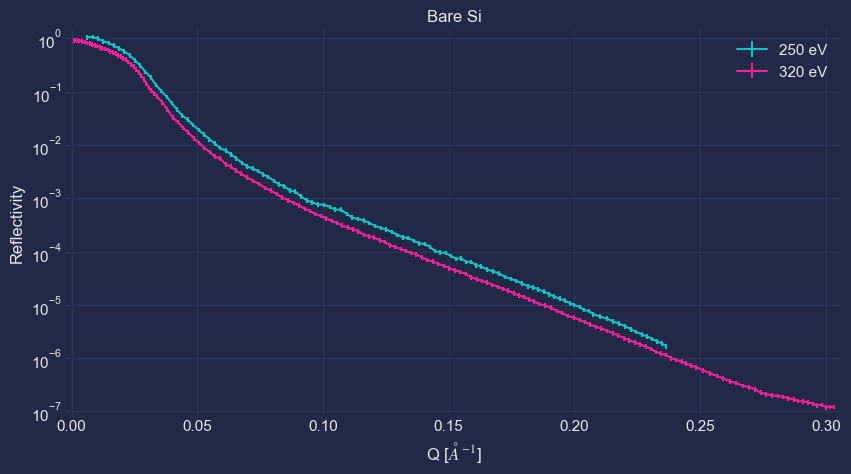

In [7]:
# For now, we need 250 eV and 283.7 eV data for room temperature znpc and the C60/ZnPc bilayer

import matplotlib.pyplot as plt


oc_znpc = db.get_oc("C32H16N8Zn")
oc_c60 = db.get_oc("C60")

bare_si_struct = db.get_struct("BareSi")
c60_znpc_bilayer_struct = db.get_struct("C60_ZnPc_bilayer")
znpc_struct = db.get_struct("ZnPc_RoomTemp")

# This is cumbersome and should be replaced with the new ReflData class that is being developed

bare_si = {
    "250": db.get_refl("250_BareSi.csv", "BareSi"),
    "320": db.get_refl("320_BareSi.csv",  "BareSi"), # 320 eV is chosen to have contrast between the SiO2 and C
}
znpc_mono = {
    "250": {
        "s": db.get_refl("zrt_250.0_100.csv", "ZnPc"),
        "p": db.get_refl("zrt_250.0_190.csv", "ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("ZnPc_283.7_100.0 (CCD Scan 82865).parquet", "ZnPc"),
        "p": db.get_refl("ZnPc_283.7_190.0 (CCD Scan 82869).parquet", "ZnPc"),
        },
}
c60_znpc = {
    "250": {
        "s": db.get_refl("C60-ZnPc_250.0_100.0_refl (CCD Scan 82877).csv", "C60-ZnPc"),
        "p": db.get_refl("C60-ZnPc_250.0_190.0_refl (CCD Scan 82876).csv", "C60-ZnPc"),
        },
    "283.7": {
        "s": db.get_refl("C60-ZnPc_283.7_100.0_refl (CCD Scan 82877).csv", "C60-ZnPc"),
        "p": db.get_refl("C60-ZnPc_283.7_190.0_refl (CCD Scan 82876).csv","C60-ZnPc"),
        },
}

fig, ax = plt.subplots(nrows = 1, sharex=True, gridspec_kw = {"hspace": 0.0})
ax.set_title("Bare Si")
ax.set_ylabel("Reflectivity")
bare_si["250"].plot(ax=ax, x = "Q", y = "Refl", yerr="Err", logy = True, label="250 eV")
bare_si["320"].plot(ax=ax, x = "Q", y = "Refl", yerr="Err", logy = True, label="320 eV")
ax.legend()
ax.set_xlabel(r"Q [$\AA^{-1}$]")

bare_si_data = [
    rf.to_refnx_dataset(bare_si["250"]),
    rf.to_refnx_dataset(bare_si["320"]),
]

0      False
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Name: Theta, Length: 137, dtype: bool

8.926743258090791e-07

1.0470876967227024e-06

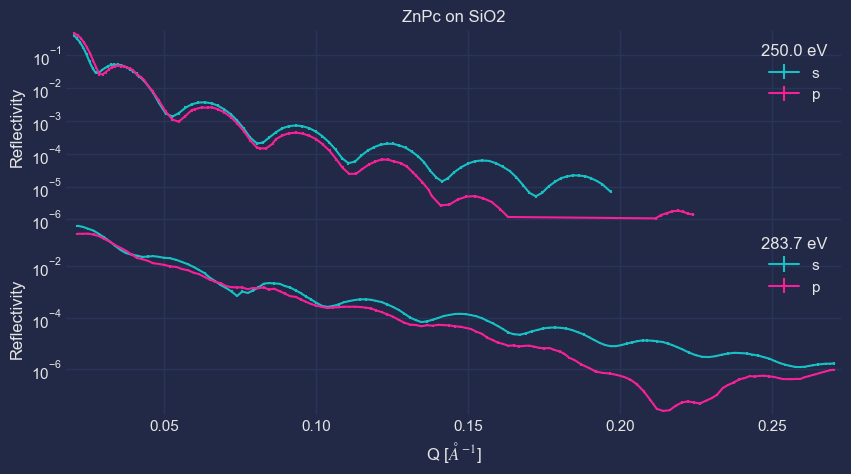

In [8]:
fig, ax = plt.subplots(nrows = 2, sharex=True, gridspec_kw = {"hspace": 0.0})
ax[0].set_title("ZnPc on SiO2")
ax[0].set_ylabel("Reflectivity")
ax[1].set_ylabel("Reflectivity")
znpc_mono["250"]["s"] = rf.smart_mask(znpc_mono["250"]["s"])
znpc_mono["250"]["p"] = rf.smart_mask(znpc_mono["250"]["p"], pol = "p")
znpc_mono["283.7"]["s"] = rf.smart_mask(znpc_mono["283.7"]["s"])
znpc_mono["283.7"]["p"] = rf.smart_mask(znpc_mono["283.7"]["p"])


znpc_mono["250"]["s"].plot(ax=ax[0], x = "Q", y = "Refl", yerr="Err", logy = True, label="250 eV")
znpc_mono["250"]["p"].plot(ax=ax[0], x = "Q", y = "Refl", yerr="Err", logy = True, label="250 eV")
znpc_mono["283.7"]["s"].plot(ax=ax[1], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV")
znpc_mono["283.7"]["p"].plot(ax=ax[1], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV")
ax[0].legend(title = "250.0 eV", labels = ["s", "p"])
ax[1].legend(title = "283.7 eV", labels = ["s", "p"])
ax[1].set_xlabel(r"Q [$\AA^{-1}$]")

znpc_data = [
    rf.to_refnx_dataset(znpc_mono["250"]["s"], pol="sp", second_pol= znpc_mono["250"]["p"]),
    rf.to_refnx_dataset(znpc_mono["283.7"]["s"], pol="sp", second_pol= znpc_mono["283.7"]["p"]),
]

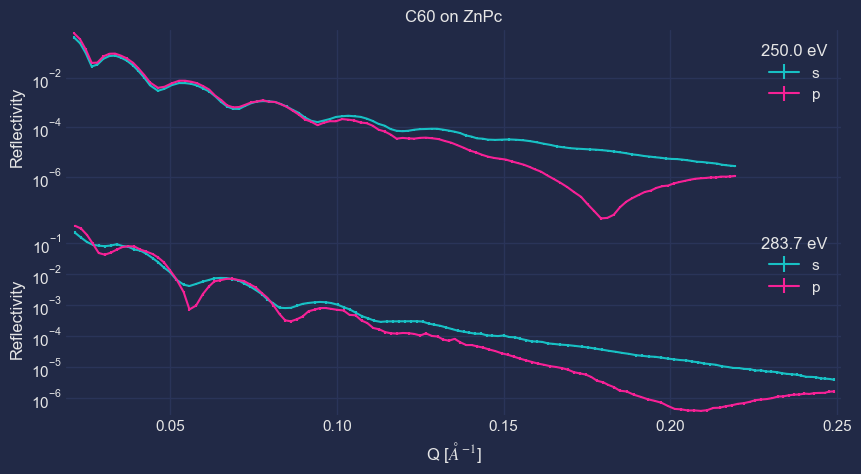

In [9]:
c60_znpc["250"]["s"] = rf.smart_mask(c60_znpc["250"]["s"])
c60_znpc["250"]["p"] = rf.smart_mask(c60_znpc["250"]["p"])
c60_znpc["283.7"]["s"] = rf.smart_mask(c60_znpc["283.7"]["s"])
c60_znpc["283.7"]["p"] = rf.smart_mask(c60_znpc["283.7"]["p"])

fig, ax = plt.subplots(nrows = 2, sharex=True, gridspec_kw = {"hspace": 0.0})
ax[0].set_title("C60 on ZnPc")
ax[0].set_ylabel("Reflectivity")
ax[1].set_ylabel("Reflectivity")
c60_znpc["250"]["s"].plot(ax=ax[0], x = "Q", y = "Refl", yerr="Err", logy = True, label="250 eV")
c60_znpc["250"]["p"].plot(ax=ax[0], x = "Q", y = "Refl", yerr="Err", logy = True, label="250 eV")
c60_znpc["283.7"]["s"].plot(ax=ax[1], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV")
c60_znpc["283.7"]["p"].plot(ax=ax[1], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV")
ax[0].legend(title = "250.0 eV", labels = ["s", "p"])
ax[1].legend(title = "283.7 eV", labels = ["s", "p"])
ax[1].set_xlabel(r"Q [$\AA^{-1}$]")

c60_znpc_data = [
    rf.to_refnx_dataset(c60_znpc["250"]["s"], pol="sp", second_pol= c60_znpc["250"]["p"]),
    rf.to_refnx_dataset(c60_znpc["283.7"]["s"], pol="sp", second_pol= c60_znpc["283.7"]["p"]),
]


# <a id='toc3_'></a>[Constructing the Multi Energy Fitting Model](#toc0_)

First we must extract the optical constants for the materials that we are using. Later on, we will instead extract orientation

In [10]:
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *
from pypxr.structure import *
from pypxr.reflectivity import *

energies = [250, 283.7]

# Needs to be updated to generate tensors from the optical model class
znpc_n_xx = oc_znpc["xx"].n(energies)
znpc_n_zz = oc_znpc["zz"].n(energies)
znpc_n = np.array([znpc_n_xx, znpc_n_xx, znpc_n_zz])

c60_n = oc_c60["iso"].n(energies)

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

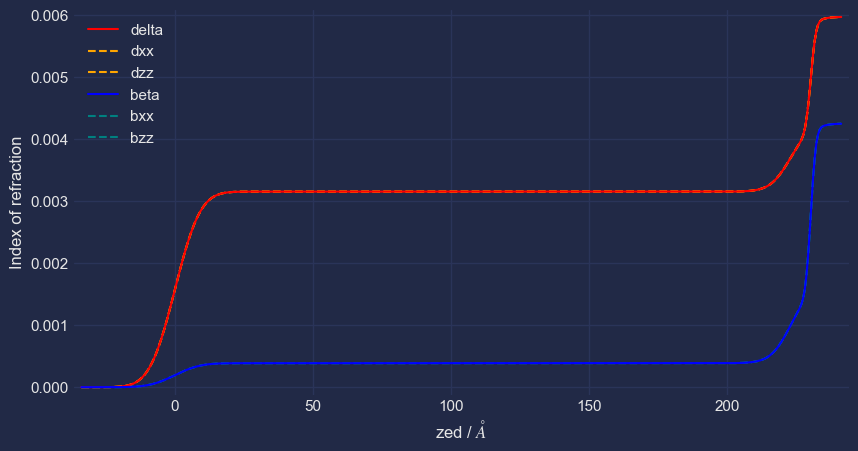

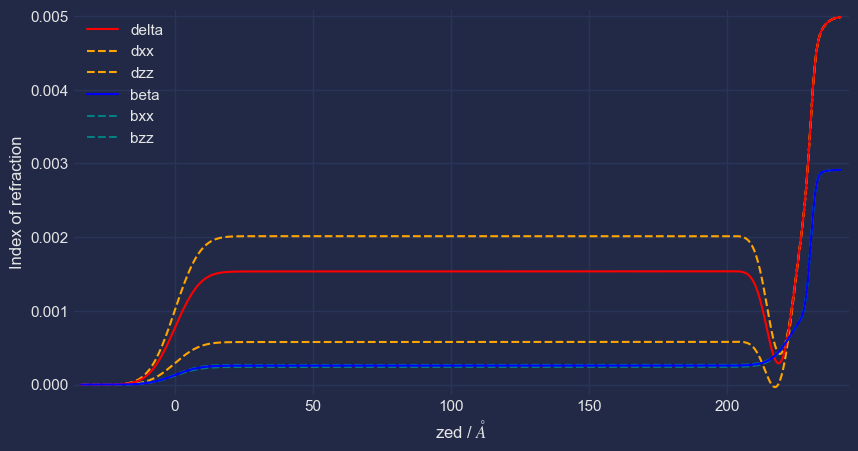

In [39]:
""" 
Parameter Constraints
"""

max_thick = 200
max_rough = 10

sio2_t = 8.000003
sio2_rough = 6.38308
sio2_rho = 1.62331

carbon_thick = 6.08467
carbon_rough = 4.40733

znpc_thick = 196.441
znpc_rough = 7.21628

vac = PXR_MaterialSLD("", 1)(0, 0)
si = [PXR_MaterialSLD("Si", 2.33, energy=en, name="Si")(0, 1.5) for en in energies]
sio2_slabs = [PXR_MaterialSLD("SiO2", sio2_rho, name="SiO2", energy = en)(sio2_t, sio2_rough) for en in energies]
carbon_slab = [PXR_MaterialSLD("C", 1.8, name="Carbon", energy=en)(carbon_thick, carbon_rough) for en in energies]

znpc_slabs = [PXR_MaterialSLD("C32H16N8Zn", 1.6, energy=energies[0], name="ZnPc")(
    znpc_thick, znpc_rough
), PXR_SLD(znpc_n[1], symmetry="uni", name = "ZnPc")(znpc_thick, znpc_rough)]


znpc_surf = [PXR_MaterialSLD("C32H16N8Zn", 1.6, energy=energies[0], name="ZnPc")(
    znpc_thick/10, znpc_rough
), PXR_SLD(znpc_n[1], symmetry="uni", name = "ZnPc")(znpc_thick/10, znpc_rough)]

structs = []
for i, en in enumerate(energies):
    structs.append(vac | znpc_surf[i] | znpc_slabs[i] | carbon_slab[i] | sio2_slabs[i] | si[i])

structs[0].plot()
structs[1].plot()

In [13]:
from Logp import LogpExtra_rough


scale_vary = True
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = True
bkg_lb = 1e-9
bkg_ub = 9e-6

random_state = 1
nwalkers = 1000
nsamples = 200

move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]

models = []
objectives = []
for i, en in enumerate(energies):
    model = PXR_ReflectModel(
        structs[i], scale=1, bkg=0, dq=0, energy=en, pol="sp", name=f"ZnPc_{en}"
    )

    model.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))
    model.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))
    models.append(model)

    objective = Objective(model, znpc_data[i], transform=Transform("logY"), name=f"obj_{en}")
    lpe = LogpExtra_rough(objective)
    objective.logp_extra = lpe
    objectives.append(objective)
    
    objective.plot()

obj = GlobalObjective(objectives)

In [41]:
for i, slab in enumerate(sio2_slabs):
    if i !=0:
        slab.thick.setp(vary=None, constraint=sio2_slabs[0].thick)
        slab.rough.setp(vary=None, constraint=sio2_slabs[0].rough)
        slab.sld.density.setp(vary=None, constraint=sio2_slabs[0].sld.density)
    else:
        slab.thick.setp(vary=False, bounds=(7, 9))
        slab.rough.setp(vary=False, bounds=(5, 7))
        slab.sld.density.setp(vary=True, bounds=(1.5, 1.7))

for i, slab in enumerate(carbon_slab):
    if i != 0:
        slab.thick.setp(vary=None, constraint=carbon_slab[0].thick)
        slab.rough.setp(vary=None, constraint=carbon_slab[0].rough)
        slab.sld.density.setp(vary=None, constraint=carbon_slab[0].sld.density)
    else:
        slab.thick.setp(vary=False, bounds=(5, 7))
        slab.rough.setp(vary=False, bounds=(3, 5))
        slab.sld.density.setp(vary=True, bounds=(0.7, 2))

for i, slab in enumerate(znpc_slabs):
    if i != 0:
        slab.thick.setp(vary=None, constraint=znpc_slabs[0].thick)
        slab.rough.setp(vary=None, constraint=znpc_slabs[0].rough)

        slab.sld.xx.setp(vary=True, bounds=(-.005, .003))
        slab.sld.zz.setp(vary=True, bounds=(-.005, .003))
        slab.sld.ixx.setp(vary=True, bounds=(0.0, .003))
        slab.sld.izz.setp(vary=True, bounds=(0.0, .003))

    else:
        slab.thick.setp(vary=True, bounds=(100, 200))
        slab.rough.setp(vary=True, bounds=(5, 7))
        slab.sld.density.setp(vary=True, bounds=(1.5, 1.7))

for i, slab in enumerate(znpc_surf):
    if i != 0:
        slab.thick.setp(vary=None, constraint=znpc_surf[0].thick)
        slab.rough.setp(vary=None, constraint=znpc_surf[0].rough)

        slab.sld.xx.setp(vary=True, bounds=(-.005, .003))
        slab.sld.zz.setp(vary=True, bounds=(-.005, .003))
        slab.sld.ixx.setp(vary=True, bounds=(0.0, .003))
        slab.sld.izz.setp(vary=True, bounds=(0.0, .003))

    else:
        slab.thick.setp(vary=True, bounds=(0, 10))
        slab.rough.setp(vary=True, bounds=(5, 7))
        slab.sld.density.setp(vary=True, bounds=(1.5, 1.7))

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\refnx\_lib\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 200/200 [01:30<00:00,  2.22it/s]


________________________________________________________________________________
Parameters:      None      
<Parameter:    'scale'    , value=0.901593 +/- 0.204, bounds=[0.6, 1.2]>
<Parameter:     'bkg'     , value=4.44758e-06 +/- 3.07e-06, bounds=[1e-09, 9e-06]>
<Parameter: 'ZnPc_thick'  , value=5.5333 +/- 3.68 , bounds=[0.0, 10.0]>
<Parameter:     'rho'     , value=1.59828 +/- 0.0674, bounds=[1.5, 1.7]>
<Parameter: 'ZnPc_rough'  , value=5.99632 +/- 0.682, bounds=[5.0, 7.0]>
<Parameter: 'ZnPc_thick'  , value=150.5 +/- 34.9 , bounds=[100.0, 200.0]>
<Parameter:     'rho'     , value=1.5979 +/- 0.0694, bounds=[1.5, 1.7]>
<Parameter: 'ZnPc_rough'  , value=5.99431 +/- 0.685, bounds=[5.0, 7.0]>
<Parameter:     'rho'     , value=1.34204 +/- 0.444, bounds=[0.7, 2.0]>
<Parameter:     'rho'     , value=1.59896 +/- 0.0686, bounds=[1.5, 1.7]>
<Parameter:    'scale'    , value=0.888908 +/- 0.202, bounds=[0.6, 1.2]>
<Parameter:     'bkg'     , value=3.79713e-06 +/- 3.15e-06, bounds=[1e-09, 9e-06]>

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

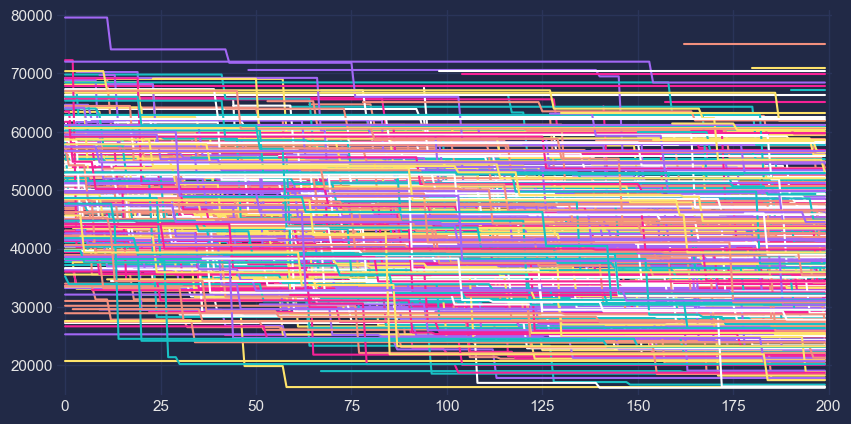

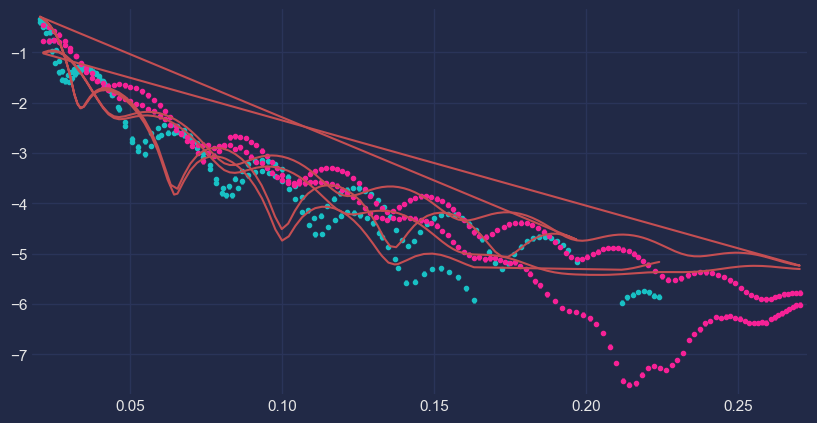

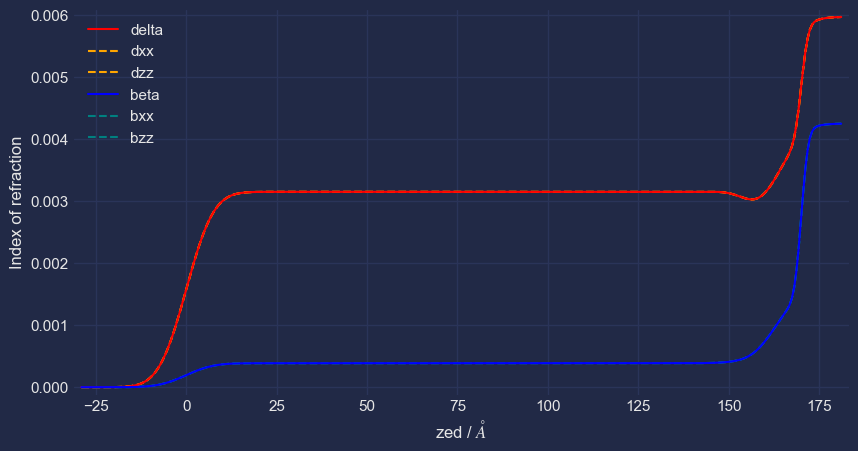

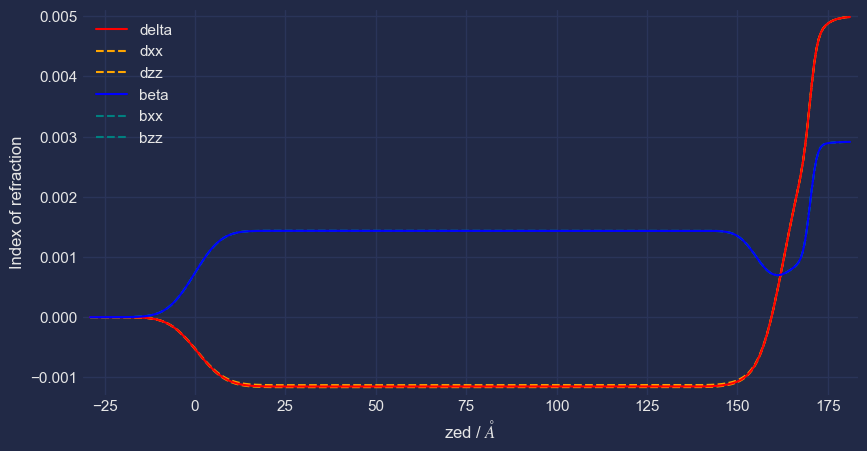

In [42]:
fitter = CurveFitter(obj, nwalkers=nwalkers, moves=move)
fitter.initialise("prior")
chain = fitter.sample(int(nsamples), random_state=random_state)
lp = fitter.logpost
plt.plot(-lp)

print(obj.varying_parameters())
obj.plot()

structs[0].plot()
structs[1].plot()

In [15]:
sio2_slabs.thick.setp(vary=True, bounds = (sio2_t - sio2_t*.1, sio2_t + sio2_t*.1))
sio2_slabs.rough.setp(vary=True, bounds = (sio2_rough - sio2_rough*.1, sio2_rough + sio2_rough*.01))

carbon_slab.thick.setp(vary=True, bounds = (carbon_thick - carbon_thick*.1, carbon_thick + carbon_thick*.1))
carbon_slab.rough.setp(vary=True, bounds=(carbon_rough - carbon_rough*.1, carbon_rough + carbon_rough*.1))
carbon_slab.sld.density.setp(vary=True, bounds=(0.7, 2))

  0%|          | 0/400 [00:00<?, ?it/s]c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\refnx\_lib\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 400/400 [05:02<00:00,  1.32it/s]


________________________________________________________________________________
Parameters:      None      
<Parameter: 'ZnPc_thick'  , value=197.268 +/- 0.421, bounds=[150.0, 300.0]>
<Parameter:     'rho'     , value=1.61068 +/- 0.00117, bounds=[1.61, 1.62]>
<Parameter: 'ZnPc_rough'  , value=8.53597 +/- 0.285, bounds=[0.0, 10.0]>
<Parameter:'Carbon_thick' , value=6.59397 +/- 0.239, bounds=[5.476203, 6.693137]>
<Parameter:     'rho'     , value=1.55315 +/- 0.16 , bounds=[0.7, 2.0]>
<Parameter:'Carbon_rough' , value=4.62002 +/- 0.243, bounds=[3.966597, 4.848063]>
<Parameter: 'SiO2_thick'  , value=7.30715 +/- 0.228, bounds=[7.2000027, 8.8000033]>
<Parameter: 'SiO2_rough'  , value=5.76408 +/- 0.0775, bounds=[5.744771999999999, 6.4469107999999995]>


(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

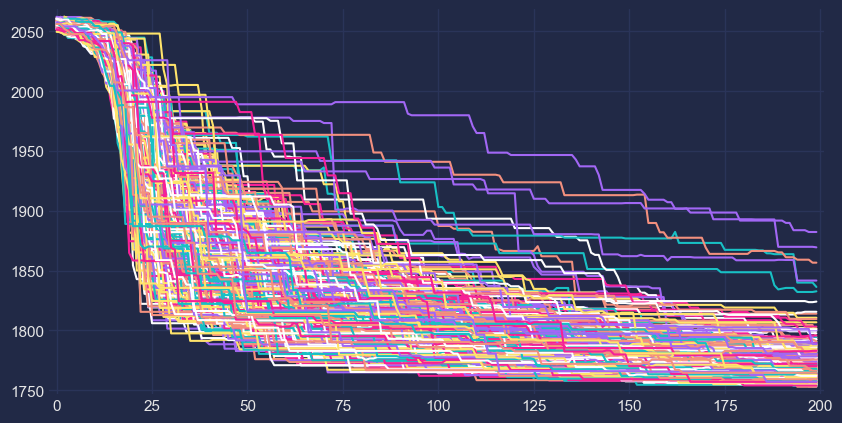

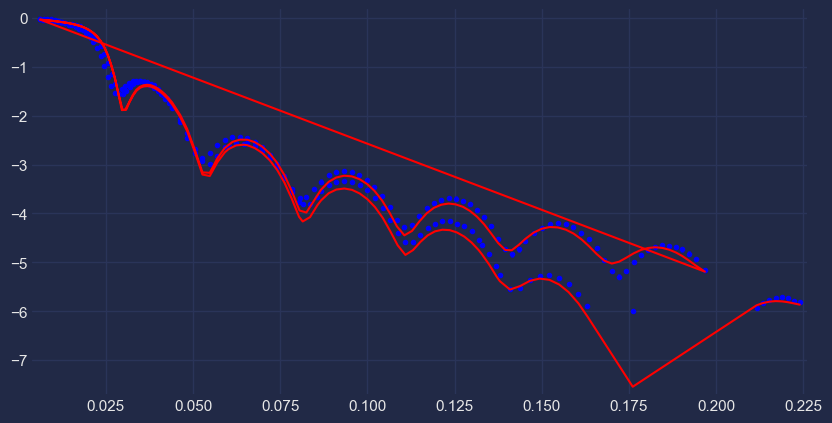

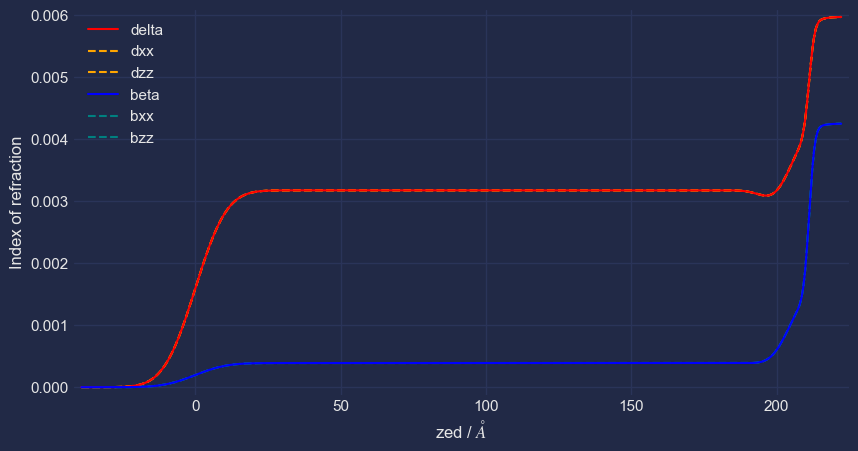

In [16]:
fitter = CurveFitter(obj, nwalkers=nwalkers, moves=move)
fitter.initialise("jitter")
chain = fitter.sample(int(nsamples), nthin=2, random_state=random_state)
lp = fitter.logpost
plt.plot(-lp)

print(obj.varying_parameters())
objective.plot()
structs[0].plot()
structs[1].plot()

## <a id='toc3_1_'></a>[eV Fitting](#toc0_)

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

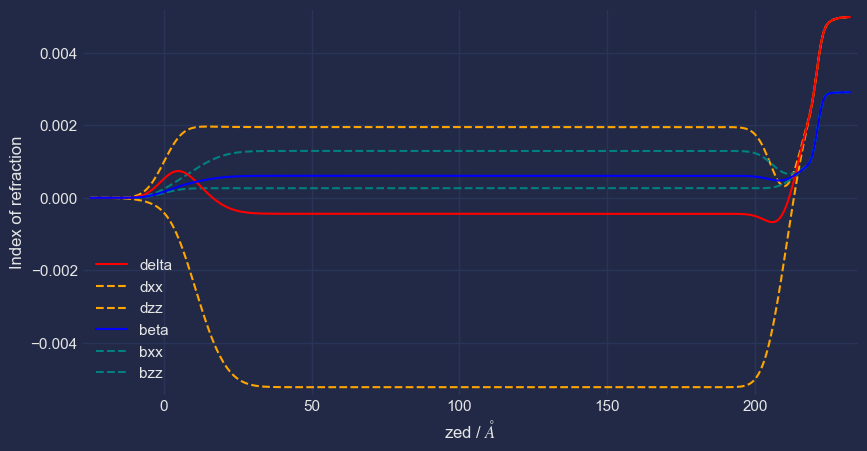

In [32]:
en2 = energies[1]
vac = PXR_MaterialSLD("", 1)(0, 0)
si = PXR_MaterialSLD("Si", 2.33, energy=en2, name="Si")(0, 1.5)
sio2_slabs_2 = PXR_MaterialSLD("SiO2", sio2_slabs.sld.density.value, energy=en2,name="SiO2")(sio2_slabs.thick.value, sio2_slabs.rough.value)
carbon_slab_2 = PXR_MaterialSLD("C", carbon_slab.sld.density.value, energy=en2,name="Carbon")(carbon_slab.thick.value, carbon_slab.rough.value)

znpc_slabs_2 = PXR_SLD(znpc_n[2], symmetry="uni", name = "ZnPc")(
    znpc_slabs.thick.value, znpc_slabs.rough.value
)
znpc_s = PXR_SLD(znpc_n[0], symmetry="uni", name = "ZnPc_Surface")(10, 5)

struct_2 = vac| znpc_s | znpc_slabs_2 | carbon_slab_2 | sio2_slabs_2 | si
struct_2.plot()

c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:115: RuntimeWarning: invalid value encountered in arcsin
  theta_exp = np.pi/2 - np.arcsin(flatq[:]  / (2*k0))
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:196: RuntimeWarning: invalid value encountered in sqrt
  kz_ord = np.sqrt(e_o * k0**2 - k_par[:]**2)#, dtype=np.complex128)
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:240: RuntimeWarning: invalid value encountered in divide
  knorm = kvec / kdiv [:,:,None]#(np.linalg.norm(kvec,axis=-1)[:,:,None])
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:251: RuntimeWarning: invalid value encountered in divide
  dpol_temp[:,0,:] = np.subtract(opticaxis[None, :], ((1 + nu)/(1+nu*kpol[:, 0, None]**2))*kpol[:, 0, None] * knorm[:, 0, :])
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:252: RuntimeWarning: invalid value encountered

Text(0, 0.5, 'Reflectivity')

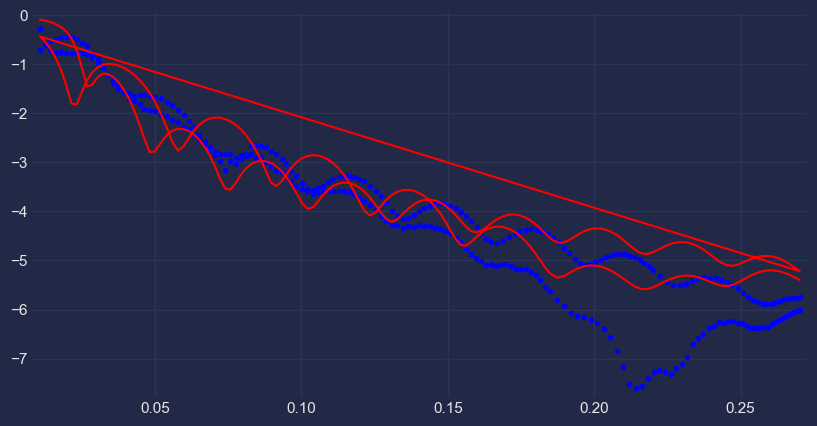

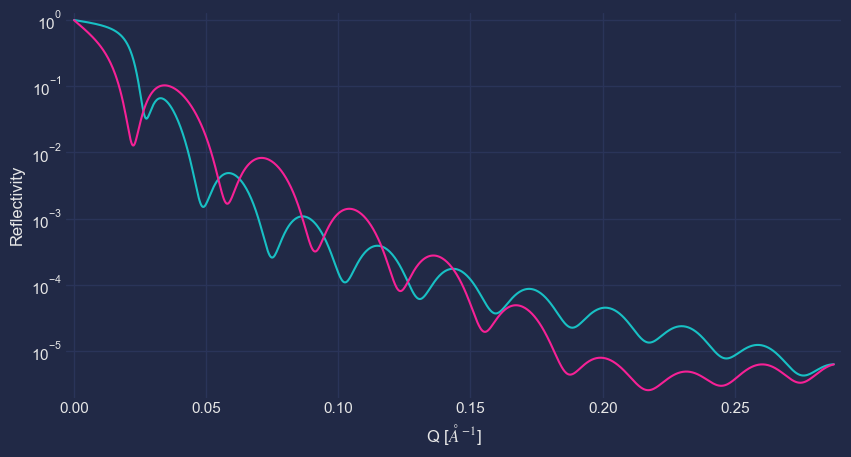

In [33]:
# en2 = energies[1]

scale_vary = True
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = True
bkg_lb = 1e-9
bkg_ub = 9e-6

random_state = 1
nwalkers = 200
nsamples = 200

move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]
chain_name = "znpc_room_temp.txt"
save_fitter = "znpc_room_temp_fitter.pkl"

model_2 = PXR_ReflectModel(
    struct_2, scale=1, bkg=0, dq=0, energy=en2, pol="sp", name=f"ZnPc_{en2}"
)
model_2_s = PXR_ReflectModel(
    struct_2, scale=1, bkg=0, dq=0, energy=en2, pol="s", name=f"ZnPc_{en2}"
)
model_2_p = PXR_ReflectModel(
    struct_2, scale=1, bkg=0, dq=0, energy=en2, pol="p", name=f"ZnPc_{en2}"
)

model.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))
model.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))

objective_2 = Objective(model_2, znpc_data[1], transform=Transform("logY"), name=f"obj_{en2}")
lpe = LogpExtra_rough(objective_2)
objective_2.logp_extra = lpe
objective_2.plot()

q = np.linspace(0.0001, 0.3, 1000)
fig, ax = plt.subplots()
ax.plot(q, model_2_s(q))
ax.plot(q, model_2_p(q))
ax.set_yscale("log")
ax.set_xlabel(r"Q [$\AA^{-1}$]")
ax.set_ylabel(r"Reflectivity")

In [30]:
sio2_slabs_2.thick.setp(vary=False)
sio2_slabs_2.rough.setp(vary=False)

carbon_slab_2.thick.setp(vary=False)
carbon_slab_2.rough.setp(vary=False)
carbon_slab_2.sld.density.setp(vary=False, bounds=(0.7, 2))

znpc_slabs_2.thick.setp(vary=None, bounds=(max_thick / 2, max_thick), constraint=znpc_slabs.thick.value - znpc_s.thick.value)
znpc_slabs_2.rough.setp(vary=None, bounds=(0, max_rough), constraint=znpc_slabs.rough.value - znpc_s.rough.value)
znpc_slabs_2.sld.delta.setp(vary=True, bounds=(-.005, .003))
znpc_slabs_2.sld.beta.setp(vary=True, bounds=(0, .002))

znpc_slabs_2.sld.xx.setp(vary=True, bounds=(-.005, .003))
znpc_slabs_2.sld.zz.setp(vary=True, bounds=(-.005, .003))
znpc_slabs_2.sld.ixx.setp(vary=True, bounds=(0, .002))
znpc_slabs_2.sld.izz.setp(vary=True, bounds=(0, .002))

znpc_s.thick.setp(vary=True, bounds=(0, znpc_slabs.thick.value))
znpc_s.rough.setp(vary=True, bounds=(0, znpc_slabs.rough.value))
znpc_s.sld.delta.setp(vary=True, bounds=(-.005, .003))
znpc_s.sld.beta.setp(vary=True, bounds=(0, .002))

znpc_s.sld.xx.setp(vary=True, bounds=(-.005, .003))
znpc_s.sld.zz.setp(vary=True, bounds=(-.005, .003))
znpc_s.sld.ixx.setp(vary=True, bounds=(0, .002))
znpc_s.sld.izz.setp(vary=True, bounds=(0, .002))

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\refnx\_lib\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 200/200 [00:31<00:00,  6.35it/s]


________________________________________________________________________________
Parameters:      None      
<Parameter: 'ZnPc_thick'  , value=85.1432 +/- 57.4 , bounds=[0.0, 197.26776786515356]>
<Parameter:  'ZnPc_diso'  , value=-0.000955275 +/- 0.00258, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_biso'  , value=0.000997678 +/- 0.000671, bounds=[0.0, 0.002]>
<Parameter:   'ZnPc_xx'   , value=-0.0011964 +/- 0.00163, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.000745575 +/- 0.000603, bounds=[0.0, 0.002]>
<Parameter:   'ZnPc_zz'   , value=-0.00092211 +/- 0.00204, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_izz'   , value=0.000811922 +/- 0.000625, bounds=[0.0, 0.002]>
<Parameter: 'ZnPc_rough'  , value=5.56503 +/- 2.81 , bounds=[0.0, 8.535974224990804]>
<Parameter:  'ZnPc_diso'  , value=-0.00105271 +/- 0.00244, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_biso'  , value=0.00100318 +/- 0.000656, bounds=[0.0, 0.002]>
<Parameter:   'ZnPc_xx'   , value=-0.0019382 +/- 0.0015, bounds

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

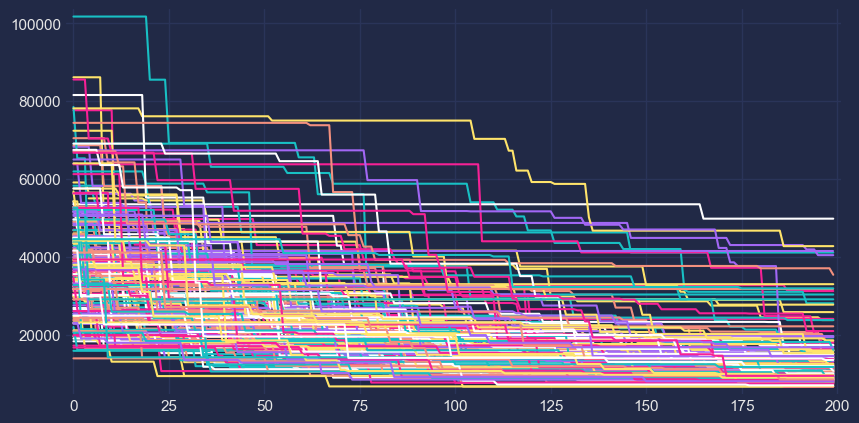

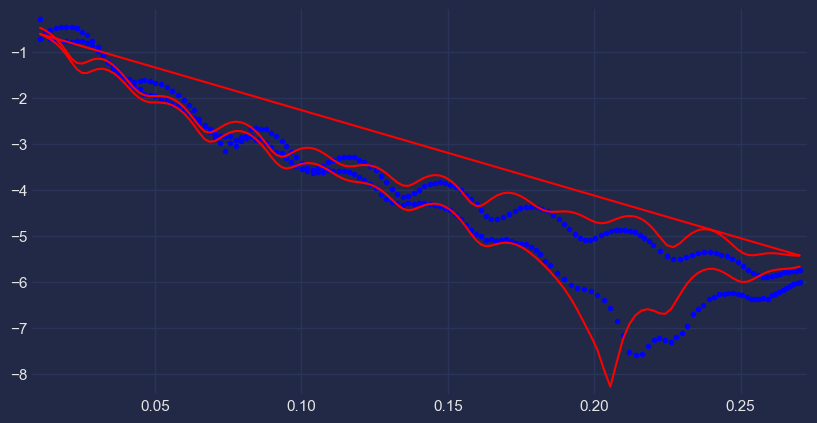

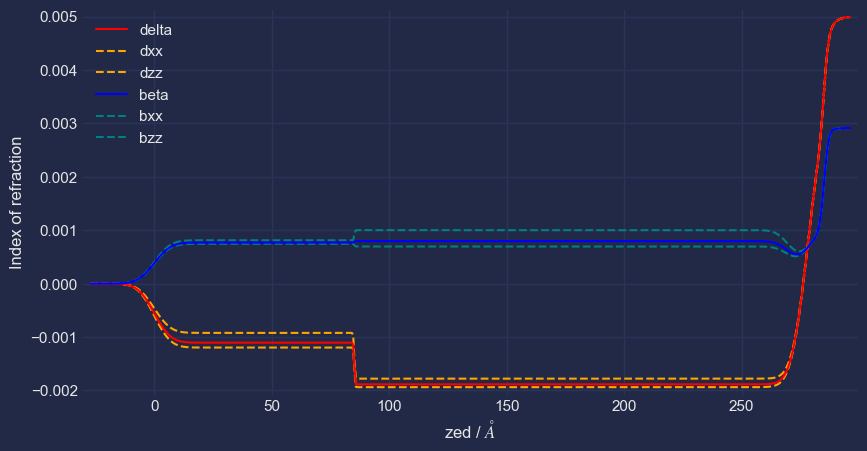

In [31]:
fitter_2 = CurveFitter(objective_2, nwalkers=nwalkers, moves=move)
fitter_2.initialise("prior")
chain = fitter_2.sample(int(nsamples), random_state=random_state)
lp_2 = fitter_2.logpost
plt.plot(-lp_2)

print(objective_2.varying_parameters())
objective_2.plot()
struct_2.plot()

# <a id='toc4_'></a>[Trying to Renormalization](#toc0_)

As opposed to normalizing based on the experimental intensity, we can instead normalize based on the calculated intensity. To do this, we need to calculate the intensity of the reflectivity curve via a model. 

c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:115: RuntimeWarning: invalid value encountered in arcsin
  theta_exp = np.pi/2 - np.arcsin(flatq[:]  / (2*k0))
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:196: RuntimeWarning: invalid value encountered in sqrt
  kz_ord = np.sqrt(e_o * k0**2 - k_par[:]**2)#, dtype=np.complex128)
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:240: RuntimeWarning: invalid value encountered in divide
  knorm = kvec / kdiv [:,:,None]#(np.linalg.norm(kvec,axis=-1)[:,:,None])
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:251: RuntimeWarning: invalid value encountered in divide
  dpol_temp[:,0,:] = np.subtract(opticaxis[None, :], ((1 + nu)/(1+nu*kpol[:, 0, None]**2))*kpol[:, 0, None] * knorm[:, 0, :])
c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\pypxr\_uniaxial_reflect.py:252: RuntimeWarning: invalid value encountered

(0.0, 0.2702)

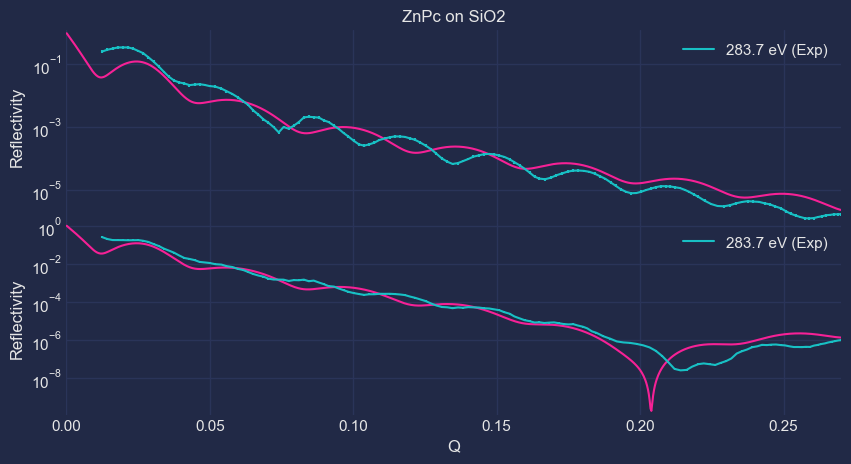

In [70]:
fig, ax = plt.subplots(nrows = 2, sharex=True, gridspec_kw = {"hspace": 0.0})

ax[0].set_title("ZnPc on SiO2")
ax[0].set_ylabel("Reflectivity")
ax[1].set_ylabel("Reflectivity")
znpc_mono["283.7"]["s"].iloc[6:].plot(ax=ax[0], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV (Exp)")
znpc_mono["283.7"]["p"].iloc[6:].plot(ax=ax[1], x = "Q", y = "Refl", yerr="Err", logy = True, label="283.7 eV (Exp)")

model_s = PXR_ReflectModel(
        structs[i], scale=1, bkg=0,energy=283.7, pol="s", name=f"ZnPc_{283.7}"
    )
model_p = PXR_ReflectModel(
        structs[i], scale=1, bkg=0, energy=283.7, pol="p", name=f"ZnPc_{283.7}"
    )

ax[0].plot(q, model_s(q), label="283.7 eV (Fit)")
ax[1].plot(q, model_p(q), label="283.7 eV (Fit)")
ax[1].set_xlim(0, znpc_mono["283.7"]["s"].Q.max())   

# <a id='toc5_'></a>[Trying individual polarization fitting](#toc0_)


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

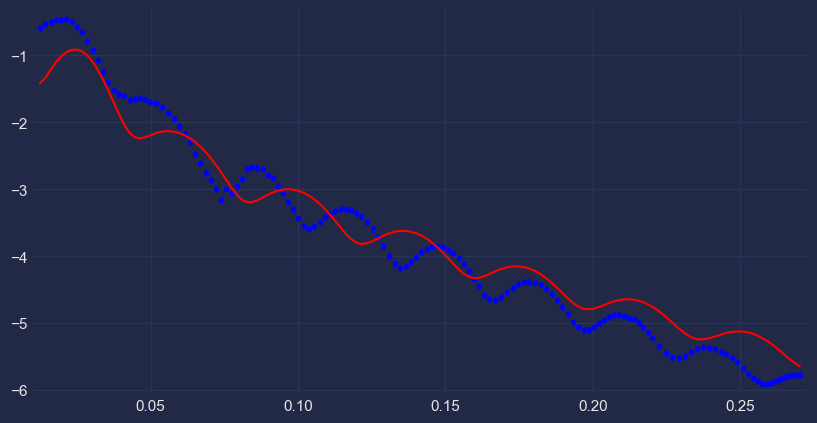

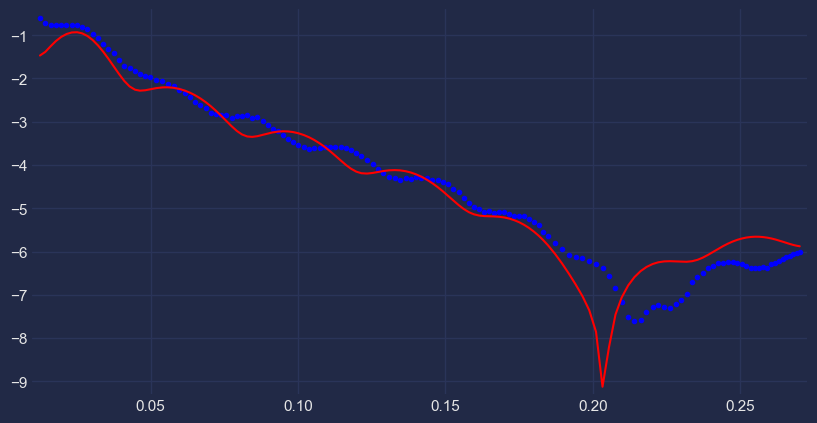

In [73]:
s_pol = ReflectDataset((znpc_mono["283.7"]["s"].iloc[6:].Q, znpc_mono["283.7"]["s"].iloc[6:].Refl, znpc_mono["283.7"]["s"].iloc[6:].Refl*.1))
p_pol = ReflectDataset((znpc_mono["283.7"]["p"].iloc[6:].Q, znpc_mono["283.7"]["p"].iloc[6:].Refl, znpc_mono["283.7"]["p"].iloc[6:].Refl*.1))

objective_s = Objective(model_s, s_pol, transform=Transform("logY"), name=f"obj_{283.7}")
objective_p = Objective(model_p, p_pol, transform=Transform("logY"), name=f"obj_{283.7}")

objective_s.plot()
objective_p.plot()

100%|██████████| 200/200 [10:00<00:00,  3.00s/it]


________________________________________________________________________________
Parameters:      None      
<Parameter:    'scale'    , value=0.794208 +/- 0.0735, bounds=[0.6, 1.2]>
<Parameter:     'bkg'     , value=1.42411e-06 +/- 5.24e-07, bounds=[1e-09, 9e-06]>
<Parameter: 'ZnPc_thick'  , value=2.31478 +/- 1.93 , bounds=[0.0, 10.0]>
<Parameter:   'ZnPc_xx'   , value=-0.00083953 +/- 0.000798, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.0012377 +/- 0.000613, bounds=[0.0, 0.003]>
<Parameter:   'ZnPc_zz'   , value=-0.00111374 +/- 0.0005, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_izz'   , value=0.00148626 +/- 0.000617, bounds=[0.0, 0.003]>
<Parameter: 'ZnPc_rough'  , value=6.3785 +/- 4.45 , bounds=[5.0, 7.0]>
<Parameter: 'ZnPc_thick'  , value=159.008 +/- 8.55 , bounds=[100.0, 200.0]>
<Parameter:   'ZnPc_xx'   , value=-0.00165788 +/- 0.00051, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.000547652 +/- 0.000152, bounds=[0.0, 0.003]>
<Parameter:   'ZnPc_zz'  

AttributeError: 'PXR_ReflectModel' object has no attribute 'plot'

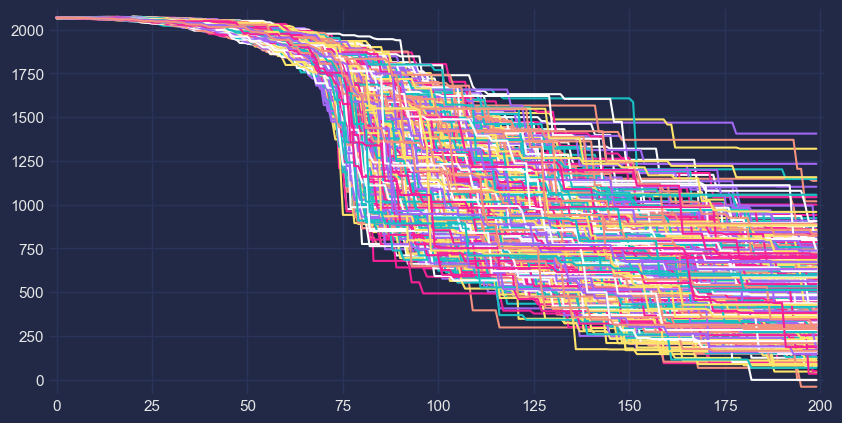

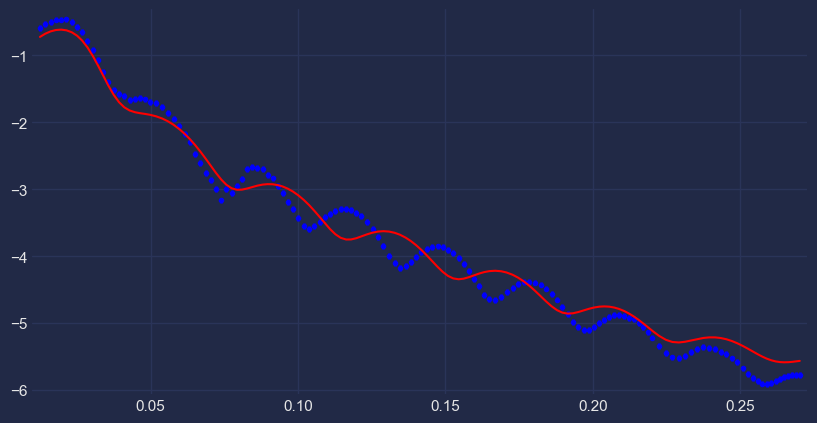

In [77]:
scale_vary = True
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = True
bkg_lb = 1e-9
bkg_ub = 9e-6

model_s.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))
model_s.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))

model_p.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))
model_p.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))

fitter_s = CurveFitter(objective_s, nwalkers=nwalkers, moves=move)
fitter_s.initialise("jitter")
chain = fitter_s.sample(int(nsamples), random_state=random_state)
lp_s = fitter_s.logpost
plt.plot(-lp_s)

objective_s.plot()
print(objective_s.varying_parameters())

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

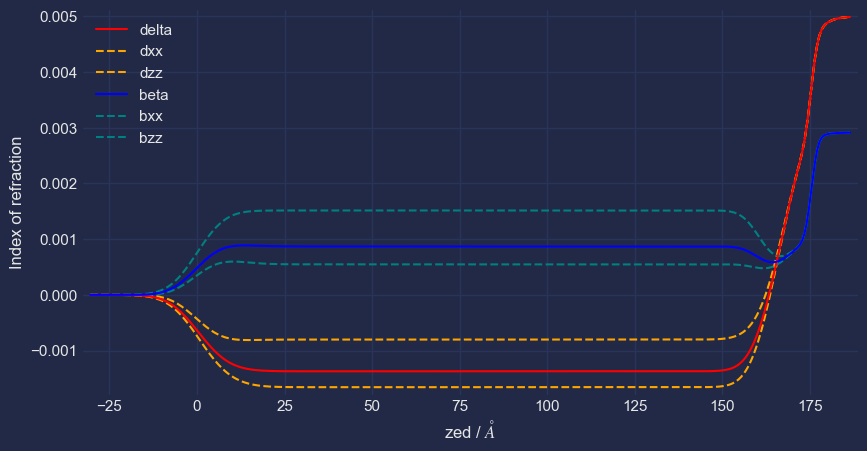

In [79]:
structs[1].plot()

100%|██████████| 200/200 [10:11<00:00,  3.06s/it]


________________________________________________________________________________
Parameters:      None      
<Parameter:    'scale'    , value=0.794208 +/- 0.0735, bounds=[0.6, 1.2]>
<Parameter:     'bkg'     , value=1.42411e-06 +/- 5.24e-07, bounds=[1e-09, 9e-06]>
<Parameter: 'ZnPc_thick'  , value=2.31449 +/- 0.0343, bounds=[0.0, 10.0]>
<Parameter:   'ZnPc_xx'   , value=-0.000839458 +/- 1.14e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.00123789 +/- 2.33e-05, bounds=[0.0, 0.003]>
<Parameter:   'ZnPc_zz'   , value=-0.00111366 +/- 3.25e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_izz'   , value=0.00148617 +/- 2.21e-05, bounds=[0.0, 0.003]>
<Parameter: 'ZnPc_rough'  , value=6.38646 +/- 0.614, bounds=[5.0, 7.0]>
<Parameter: 'ZnPc_thick'  , value=159.498 +/- 2.12 , bounds=[100.0, 200.0]>
<Parameter:   'ZnPc_xx'   , value=-0.00165786 +/- 2.51e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.000547101 +/- 3.97e-05, bounds=[0.0, 0.003]>
<Parameter:   'ZnP

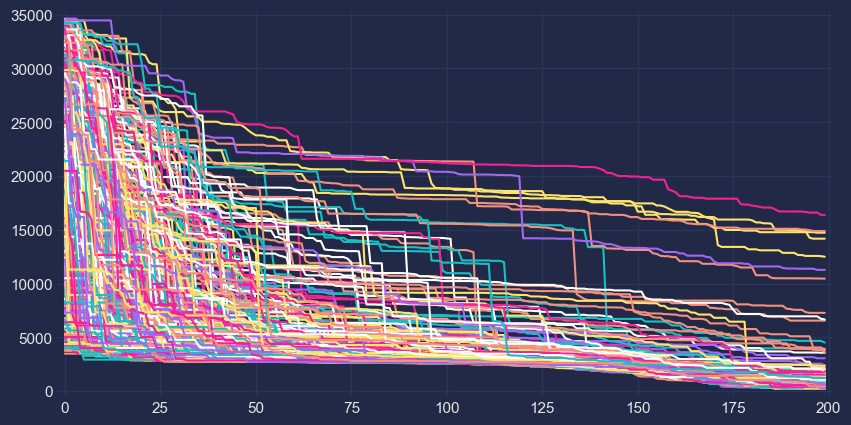

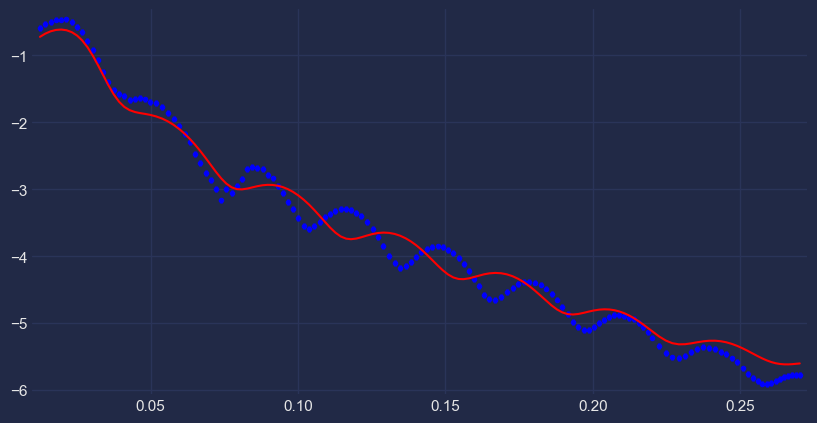

In [80]:
fitter_p = CurveFitter(objective_p, nwalkers=nwalkers, moves=move)
fitter_p.initialise("jitter")
chain = fitter_p.sample(int(nsamples), random_state=random_state)
lp_p = fitter_p.logpost
plt.plot(-lp_p)

________________________________________________________________________________
Parameters:      None      
<Parameter:    'scale'    , value=0.794208 +/- 0.0735, bounds=[0.6, 1.2]>
<Parameter:     'bkg'     , value=1.42411e-06 +/- 5.24e-07, bounds=[1e-09, 9e-06]>
<Parameter: 'ZnPc_thick'  , value=2.31449 +/- 0.0343, bounds=[0.0, 10.0]>
<Parameter:   'ZnPc_xx'   , value=-0.000839458 +/- 1.14e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.00123789 +/- 2.33e-05, bounds=[0.0, 0.003]>
<Parameter:   'ZnPc_zz'   , value=-0.00111366 +/- 3.25e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_izz'   , value=0.00148617 +/- 2.21e-05, bounds=[0.0, 0.003]>
<Parameter: 'ZnPc_rough'  , value=6.38646 +/- 0.614, bounds=[5.0, 7.0]>
<Parameter: 'ZnPc_thick'  , value=159.498 +/- 2.12 , bounds=[100.0, 200.0]>
<Parameter:   'ZnPc_xx'   , value=-0.00165786 +/- 2.51e-05, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.000547101 +/- 3.97e-05, bounds=[0.0, 0.003]>
<Parameter:   'ZnP

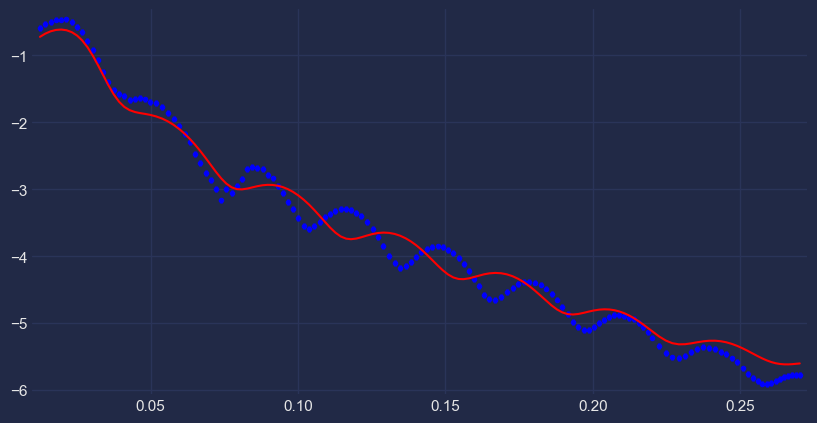

In [81]:
objective_s.plot()
print(objective_s.varying_parameters())

# <a id='toc6_'></a>[C60 Bilayer](#toc0_)

Planning to try and fit the C60 bilayer before the ZnPc room temperature data

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

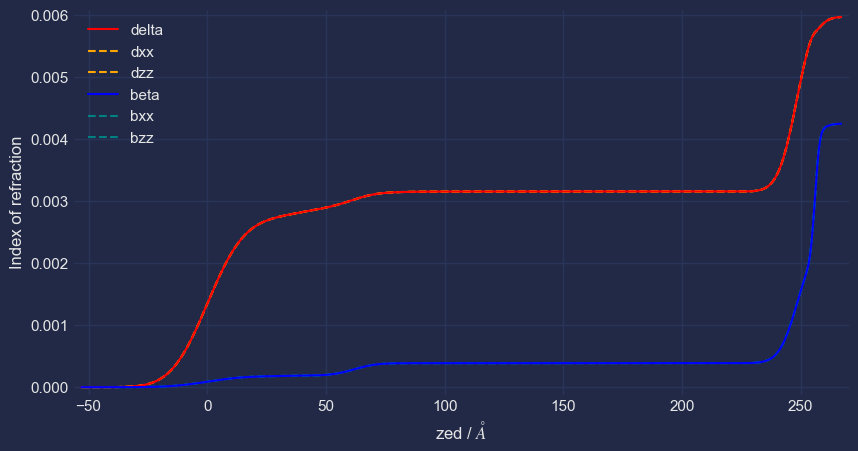

In [44]:
en = 250

sio2_t = 8.000003
sio2_rough = 6.38308
sio2_rho = 1.62331

carbon_thick = 6.08467
carbon_rough = 4.40733

znpc_thick = 180
znpc_rough = 7.21628

interface_thick = 20
interface_rough = 20

c60_thick = 42
c60_rough = 12

bulk_t = 241
bulk_r = 10

vac = PXR_MaterialSLD("", 1)(0, 0)
si = PXR_MaterialSLD("Si", 2.33, energy=en, name="Si")(0, 1.5)
sio2_1 = PXR_MaterialSLD("SiO2", 2.33, energy=en, name="Si")(sio2_t, sio2_rough)
carbon_slab = PXR_MaterialSLD("C", 1.8, energy=en, name="Carbon")(carbon_thick, carbon_rough)
c60_1 = PXR_MaterialSLD("C60", 1.6, energy=en, name="C60")(c60_thick, c60_rough)
interface_1 = PXR_MaterialSLD("C", 1.8, energy=en, name="Interface")(interface_thick, interface_rough)
znpc_1 = PXR_MaterialSLD("C32H16N8Zn", 1.6, energy=en, name="ZnPc")(znpc_thick, znpc_rough)
# bulk = PXR_MaterialSLD("C", 1.6, energy=en, name="Bulk")(bulk_t, bulk_r)

struct_1 = vac | c60_1 | interface_1 | znpc_1 | carbon_slab | sio2_1 | si

struct_1.plot()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

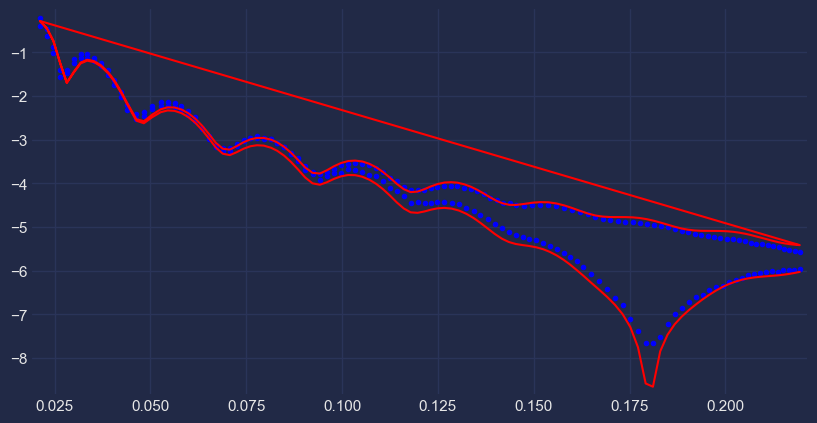

In [46]:
from Logp import LogpExtra_rough

scale_vary = False
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = False
bkg_lb = 1e-9
bkg_ub = 9e-6

random_state = 1
nwalkers = 200
nsamples = 200

move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]

model = PXR_ReflectModel(
    struct_1, scale=1, bkg=0, dq=0, energy=en, pol="sp", name=f"bilayer{en}"
)

model.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))
model.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))

objective_1 = Objective(model, c60_znpc_data[0], transform=Transform("logY"), name=f"obj_{en}")
lpe = LogpExtra_rough(objective_1)
objective_1.logp_extra = lpe
objective_1.plot()

In [47]:
max_thick = 260
max_rough = 100

sio2_1.thick.setp(vary=True, bounds=(sio2_t - sio2_t*.01, sio2_t + sio2_t*.01))
sio2_1.rough.setp(vary=True, bounds=(sio2_rough - sio2_rough*.01, sio2_rough + sio2_rough*.01))

carbon_slab.thick.setp(vary=True, bounds=(carbon_thick - carbon_thick*.01, carbon_thick + carbon_thick*.01))
carbon_slab.rough.setp(vary=True, bounds=(carbon_rough - carbon_rough*.01, carbon_rough + carbon_rough*.01))
carbon_slab.sld.density.setp(vary=True, bounds=(1.5, 2))

znpc_1.thick.setp(vary=True, bounds=(znpc_thick - znpc_thick*.5, znpc_thick + znpc_thick*.5))
znpc_1.rough.setp(vary=True, bounds=(20, max_rough))
znpc_1.sld.density.setp(vary=True, bounds=(1.5, 3))

interface_1.thick.setp(vary=True, bounds=(0, 100))
interface_1.rough.setp(vary=True, bounds=(0, 100))

c60_1.thick.setp(vary=True, bounds=(c60_1.thick - c60_1.thick*.5, c60_1.thick + c60_1.thick*.5))
c60_1.rough.setp(vary=True, bounds=(c60_rough - c60_rough*.5, c60_rough + c60_rough*.15))
c60_1.sld.density.setp(vary=True, bounds=(1.5, 3))

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\refnx\_lib\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 200/200 [01:30<00:00,  2.22it/s]


________________________________________________________________________________
Parameters:      None      
<Parameter:  'C60_thick'  , value=41.9994 +/- 0.00388, bounds=[21.0, 63.0]>
<Parameter:     'rho'     , value=1.6 +/- 0.00016, bounds=[1.5, 3.0]>
<Parameter:  'C60_rough'  , value=12 +/- 0.00121, bounds=[6.0, 13.8]>
<Parameter:'Interface_thick', value=19.9999 +/- 0.002, bounds=[0.0, 100.0]>
<Parameter:'Interface_rough', value=20 +/- 0.00198, bounds=[0.0, 100.0]>
<Parameter: 'ZnPc_thick'  , value=179.999 +/- 0.018, bounds=[90.0, 270.0]>
<Parameter:     'rho'     , value=1.59999 +/- 0.000166, bounds=[1.5, 3.0]>
<Parameter: 'ZnPc_rough'  , value=60.1227 +/- 26.9 , bounds=[20.0, 100.0]>
<Parameter:'Carbon_thick' , value=6.08464 +/- 0.000624, bounds=[6.0238233, 6.1455167]>
<Parameter:     'rho'     , value=1.79997 +/- 0.000171, bounds=[1.5, 2.0]>
<Parameter:'Carbon_rough' , value=4.40737 +/- 0.000405, bounds=[4.3632567, 4.4514033]>
<Parameter:  'Si_thick'   , value=8.00003 +/- 0.0006

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

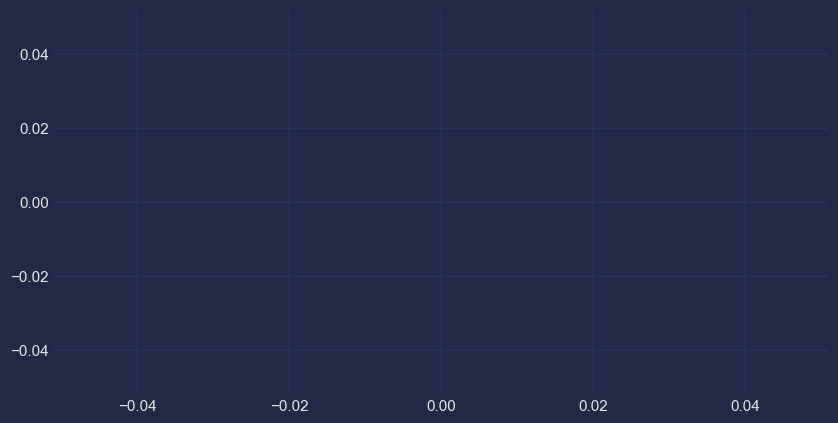

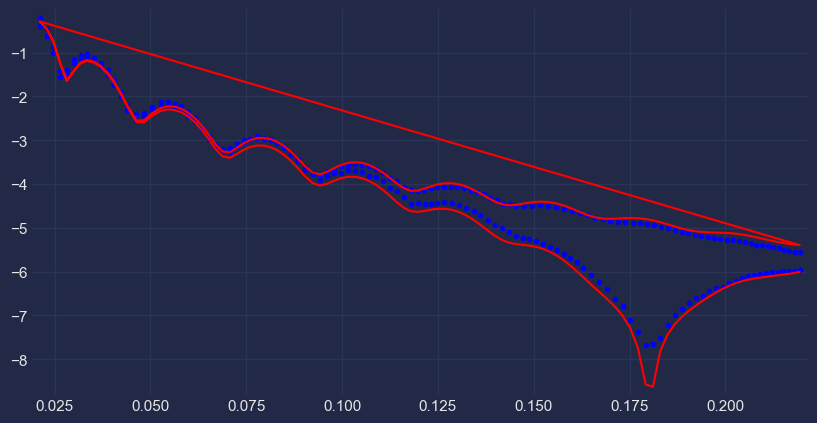

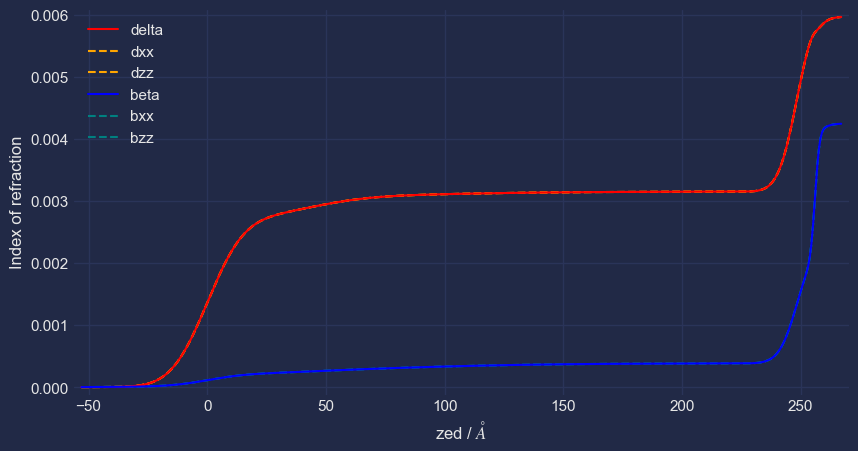

In [48]:
fitter_1 = CurveFitter(objective_1, nwalkers=nwalkers, moves=move)
fitter_1.initialise("jitter")
chain = fitter_1.sample(int(nsamples), random_state=random_state)
lp = fitter_1.logpost
plt.plot(-lp)

print(objective_1.varying_parameters())
objective_1.plot()
struct_1.plot()

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

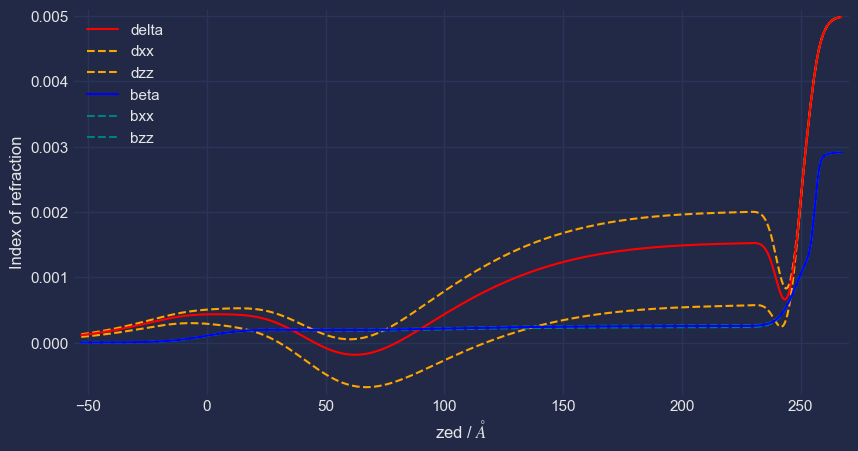

In [52]:
en = 283.7

si_2 = PXR_MaterialSLD("Si", 2.33, energy=en, name="Si")(0, 1.5)
sio2_2 = PXR_MaterialSLD("SiO2", 2.33, energy=en, name="Si")(sio2_1.thick.value, sio2_1.rough.value)
carbon_slab_2 = PXR_MaterialSLD("C", 1.8, energy=en, name="Carbon")(carbon_slab.thick.value, carbon_slab.rough.value)

znpc_2 = PXR_SLD(znpc_n[1], symmetry="uni", name = "ZnPc")(
    znpc_1.thick.value, znpc_1.rough.value
)

interface_2 = PXR_MaterialSLD("C", 1.8, energy=en, name="Interface")(interface_1.thick.value, interface_1.rough.value)

c60_2 = PXR_SLD(c60_n[1], symmetry="iso", name = "C60")(
    c60_1.thick.value, c60_1.rough.value
)

struct_2 = vac | c60_2 | interface_2 | znpc_2 | carbon_slab_2 | sio2_2 | si_2
struct_2.plot()

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

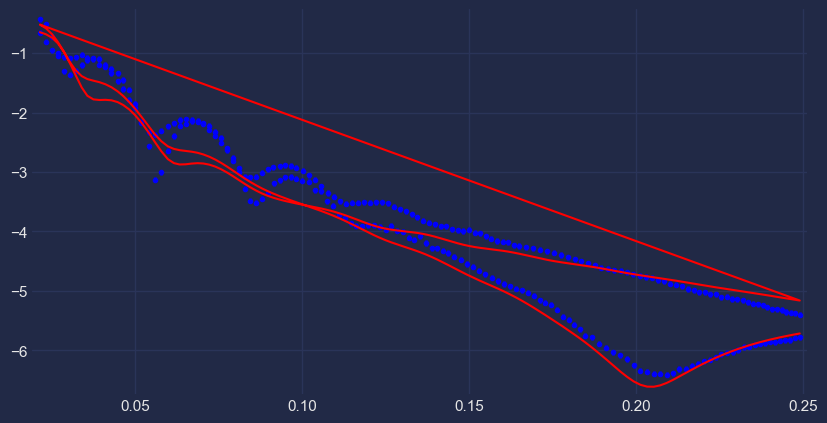

In [58]:
en = 283.7

scale_vary = False
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = False
bkg_lb = 1e-9
bkg_ub = 9e-6

random_state = 1
nwalkers = 2000
nsamples = 200

move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]

model_2 = PXR_ReflectModel(
    struct_2, scale=1, bkg=0, dq=0, energy=en, pol="sp", name=f"bilayer{en}"
)

model_2.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))
model_2.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))

objective_2 = Objective(model_2, c60_znpc_data[1], transform=Transform("logY"), name=f"obj_{en}")
lpe = LogpExtra_rough(objective_2)
objective_2.logp_extra = lpe
objective_2.plot()

In [56]:
znpc_2.thick.setp(vary=True, bounds=(znpc_2.thick.value - znpc_2.thick.value*.1, znpc_2.thick.value + znpc_2.thick.value*.1))
znpc_2.rough.setp(vary=True, bounds=(znpc_2.rough.value - znpc_2.rough.value*.1, znpc_2.rough.value + znpc_2.rough.value*.1))
znpc_2.sld.delta.setp(vary=True, bounds=(-.005, .003))
znpc_2.sld.beta.setp(vary=True, bounds=(0, .002))

znpc_2.sld.xx.setp(vary=True, bounds=(-.005, .003))
znpc_2.sld.zz.setp(vary=True, bounds=(-.005, .003))
znpc_2.sld.ixx.setp(vary=True, bounds=(0, .002))
znpc_2.sld.izz.setp(vary=True, bounds=(0, .002))

c60_2.thick.setp(vary=True, bounds = (c60_2.thick.value - c60_2.thick.value*.1, c60_2.thick.value + c60_2.thick.value*.1))
c60_2.rough.setp(vary=True, bounds = (c60_2.rough.value - c60_2.rough.value*.1, c60_2.rough.value + c60_2.rough.value*.1))
c60_2.sld.delta.setp(vary=True, bounds=(-.005, .003))
c60_2.sld.beta.setp(vary=True, bounds=(0, .002))

100%|██████████| 200/200 [11:08<00:00,  3.34s/it]


________________________________________________________________________________
Parameters:      None      
<Parameter:  'C60_thick'  , value=41.9744 +/- 2.38 , bounds=[37.79943839194239, 46.1993135901518]>
<Parameter:  'C60_diso'   , value=-0.000309889 +/- 0.000569, bounds=[-0.005, 0.003]>
<Parameter:  'C60_biso'   , value=0.000199141 +/- 0.000382, bounds=[0.0, 0.002]>
<Parameter:  'C60_rough'  , value=11.9991 +/- 0.688, bounds=[10.799984316710159, 13.199980831534639]>
<Parameter: 'ZnPc_thick'  , value=183.483 +/- 6.32 , bounds=[161.99954171561367, 197.9994398746389]>
<Parameter:  'ZnPc_diso'  , value=0.00142545 +/- 0.00191, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_biso'  , value=0.000285642 +/- 0.000429, bounds=[0.0, 0.002]>
<Parameter:   'ZnPc_xx'   , value=0.00155562 +/- 0.00136, bounds=[-0.005, 0.003]>
<Parameter:  'ZnPc_ixx'   , value=0.000265983 +/- 0.000129, bounds=[0.0, 0.002]>
<Parameter:   'ZnPc_zz'   , value=0.000105747 +/- 0.00151, bounds=[-0.005, 0.003]>
<Parameter:  '

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

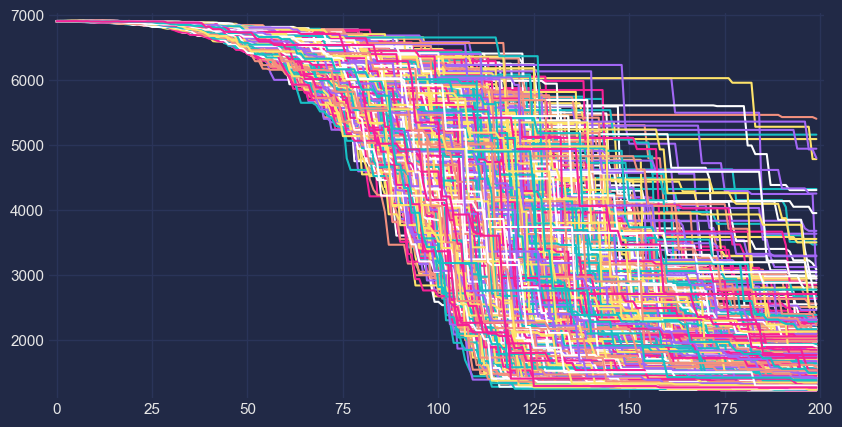

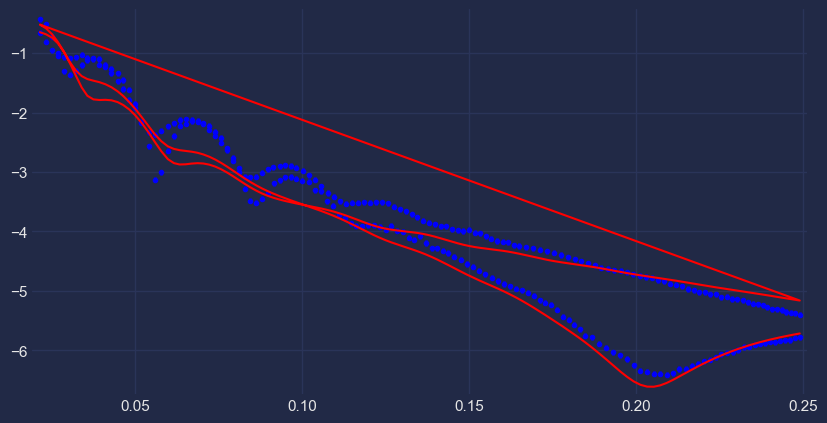

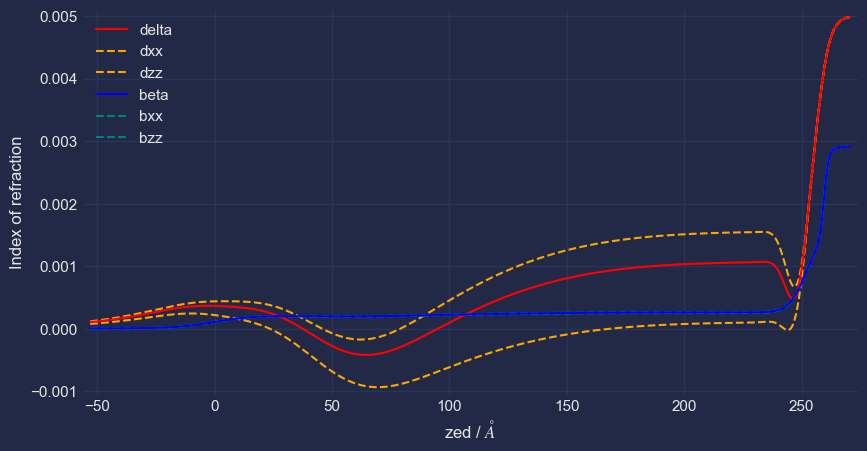

In [57]:
fitter_2 = CurveFitter(objective_2, nwalkers=nwalkers, moves=move)
fitter_2.initialise("jitter")
chain = fitter_2.sample(int(nsamples), random_state=random_state)
lp = fitter_2.logpost
plt.plot(-lp)

print(objective_2.varying_parameters())
objective_2.plot()
struct_2.plot()

# <a id='toc7_'></a>[Multi Energy Fitting](#toc0_)

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

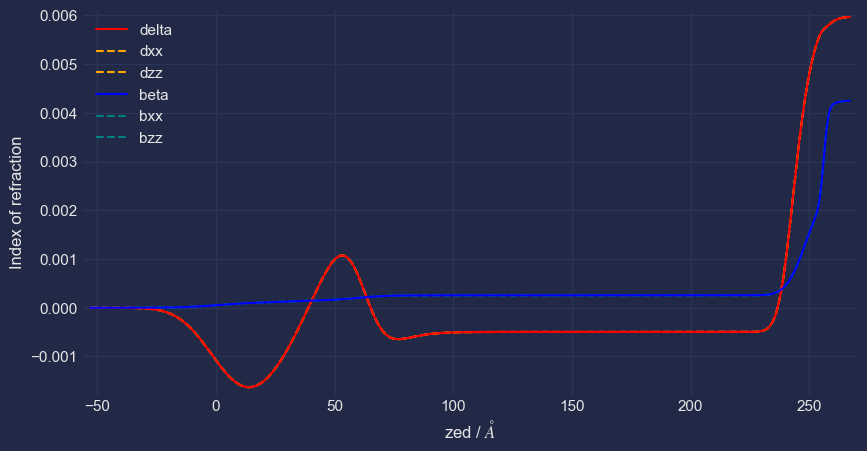

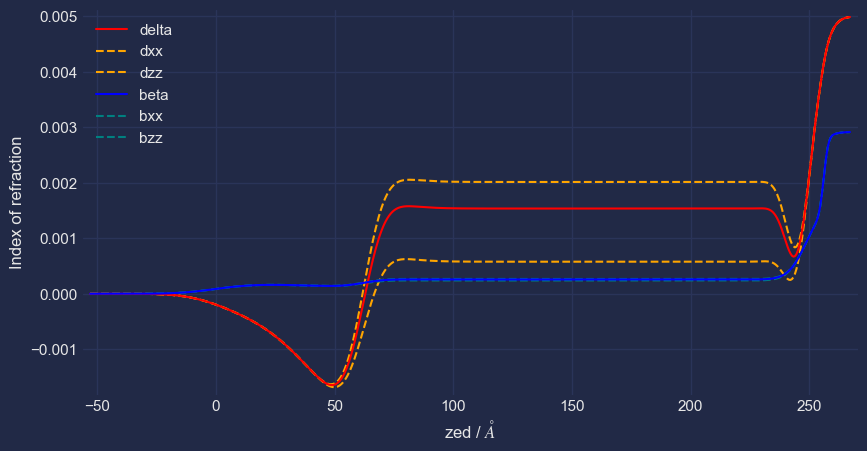

In [70]:
sio2_t = 8.000003
sio2_rough = 6.38308
sio2_rho = 1.62331

carbon_thick = 6.08467
carbon_rough = 4.40733

znpc_thick = 180
znpc_rough = 7.21628

interface_thick = 20
interface_rough = 20

c60_thick = 42
c60_rough = 12

bulk_t = 241
bulk_r = 10

energies = [250, 283.7]

vac = [PXR_MaterialSLD("", 1)(0, 0) for en in energies]
si = [PXR_MaterialSLD("Si", 2.33, energy=en, name="Si")(0, 1.5) for en in energies]
sio2 = [PXR_MaterialSLD("SiO2", 2.33, energy=en, name="Si")(sio2_t, sio2_rough) for en in energies]
carbon = [PXR_MaterialSLD("C", 1.8, energy=en, name="Carbon")(carbon_thick, carbon_rough) for en in energies]

c60 = [PXR_MaterialSLD("C60", 1.6, energy=en, name="C60")(c60_thick, c60_rough),PXR_SLD(c60_n[1], symmetry="iso", name = "C60")(c60_thick, c60_rough)]

interface = [PXR_MaterialSLD("C", 1.8, energy=en, name="Interface")(interface_thick, interface_rough)for en in energies]

znpc = [PXR_MaterialSLD("C32H16N8Zn", 1.6, energy=en, name="ZnPc")(znpc_thick, znpc_rough),PXR_SLD(znpc_n[1], symmetry="uni", name = "ZnPc")(znpc_thick, znpc_rough)]

struct = [
    vac[i] | c60[i] | interface[i] | znpc[i] | carbon[i] | sio2[i] | si[i] for i in range(len(energies))
]

struct[0].plot()
struct[1].plot()

## <a id='toc7_1_'></a>[Creating the Objective](#toc0_)

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

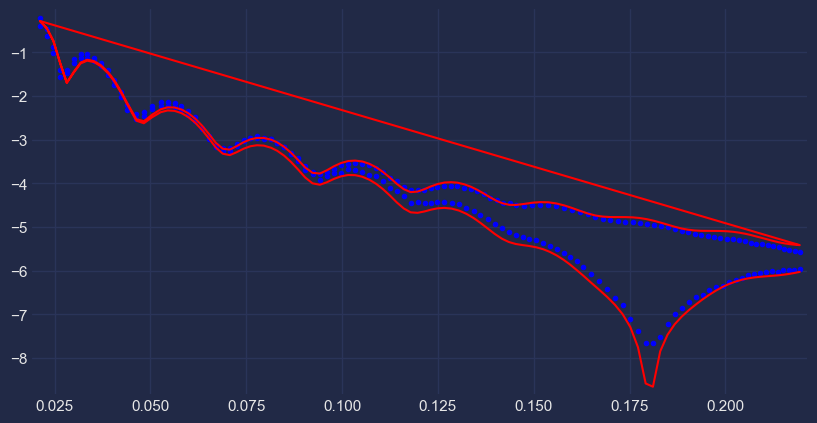

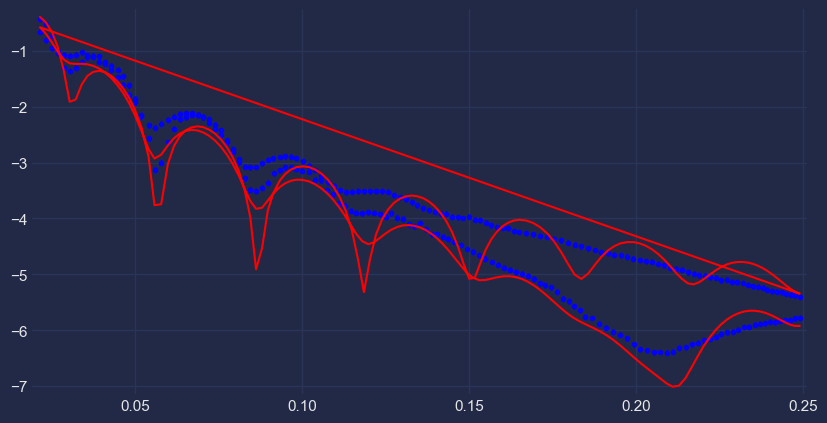

In [73]:
en = 283.7

scale_vary = False
scale_lb = 0.6
scale_ub = 1.2

bkg_vary = False
bkg_lb = 1e-9
bkg_ub = 9e-6

random_state = 1
nwalkers = 2000
nsamples = 200

move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]

model = [PXR_ReflectModel(
    struct[i], scale=1, bkg=0, dq=0, energy=en, pol="sp", name=f"bilayer{en}"
) for i, en in enumerate(energies)]

objective = [] 
for mod, data, en in zip(model, c60_znpc_data, energies):
    mod.scale.setp(vary=scale_vary, bounds=(scale_lb, scale_ub))
    mod.bkg.setp(vary=bkg_vary, bounds=(bkg_lb, bkg_ub))
    obj = Objective(mod, data, transform=Transform("logY"), name=f"obj_{en}")
    lpe = LogpExtra_rough(obj)
    obj.logp_extra = lpe
    objective.append(obj)

global_obj = GlobalObjective(objective)

objective[0].plot()
objective[1].plot()

## <a id='toc7_2_'></a>[Constraints](#toc0_)

In [74]:
for slab in si:
    slab.thick.setp(vary=False)
    slab.rough.setp(vary=False)

for i, slab in enumerate(sio2):
    vary = True if i == 0 else None
    thick_constraint = sio2[0].thick if i != 0 else None
    rough_constraint = sio2[0].rough if i != 0 else None

    slab.thick.setp(vary=vary, bounds=(sio2_t - sio2_t*.01, sio2_t + sio2_t*.01), constraint=thick_constraint)
    slab.rough.setp(vary=vary, bounds=(sio2_rough - sio2_rough*.01, sio2_rough + sio2_rough*.01), constraint=rough_constraint)
    slab.sld.density.setp(vary=True, bounds=(1.5, 2))

for i, slab in enumerate(carbon):
    vary = True if i == 0 else None
    thick_constraint = carbon[0].thick if i != 0 else None
    rough_constraint = carbon[0].rough if i != 0 else None

    slab.thick.setp(vary=vary, bounds=(carbon_thick - carbon_thick*.01, carbon_thick + carbon_thick*.01), constraint=thick_constraint)
    slab.rough.setp(vary=vary, bounds=(carbon_rough - carbon_rough*.01, carbon_rough + carbon_rough*.01), constraint=rough_constraint)
    slab.sld.density.setp(vary=True, bounds=(.07, 2))

for i, slab in enumerate(znpc):
    vary = True if i == 0 else None
    thick_constraint = znpc[0].thick if i != 0 else None
    rough_constraint = znpc[0].rough if i != 0 else None

    slab.thick.setp(vary=vary, bounds=(znpc_thick - znpc_thick*.5, znpc_thick + znpc_thick*.5), constraint=thick_constraint)
    slab.rough.setp(vary=vary, bounds=(znpc_rough - znpc_rough*.5, znpc_rough + znpc_rough*.5), constraint=rough_constraint)
    if i == 0:
        slab.sld.density.setp(vary=True, bounds=(1.5, 3))

    if i != 0:
        slab.sld.delta.setp(vary=True, bounds=(-.005, .003))
        slab.sld.beta.setp(vary=True, bounds=(0, .002))
        slab.sld.xx.setp(vary=True, bounds=(-.005, .003))
        slab.sld.zz.setp(vary=True, bounds=(-.005, .003))
        slab.sld.ixx.setp(vary=True, bounds=(0, .002))
        slab.sld.izz.setp(vary=True, bounds=(0, .002))

for i, slab in enumerate(interface):
    vary = True if i == 0 else None
    thick_constraint = interface[0].thick if i != 0 else None
    rough_constraint = interface[0].rough if i != 0 else None

    slab.thick.setp(vary=vary, bounds=(0, 100), constraint=thick_constraint)
    slab.rough.setp(vary=vary, bounds=(0, 100), constraint=rough_constraint)
    slab.sld.density.setp(vary=True, bounds=(1.5, 2))

for i, slab in enumerate(c60):
    vary = True if i == 0 else None
    thick_constraint = c60[0].thick if i != 0 else None
    rough_constraint = c60[0].rough if i != 0 else None

    slab.thick.setp(vary=vary, bounds=(c60_thick - c60_thick*.5, c60_thick + c60_thick*.5), constraint=thick_constraint)
    slab.rough.setp(vary=vary, bounds=(c60_rough - c60_rough*.5, c60_rough + c60_rough*.5), constraint=rough_constraint)
    if i == 0:
        slab.sld.density.setp(vary=True, bounds=(1.5, 3))

    if i != 0:
        slab.sld.delta.setp(vary=True, bounds=(-.005, .003))
        slab.sld.beta.setp(vary=True, bounds=(0, .002))


## <a id='toc7_3_'></a>[Fitting](#toc0_)

  0%|          | 0/200 [00:00<?, ?it/s]c:\Users\hduva\mambaforge\envs\refl\Lib\site-packages\refnx\_lib\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 200/200 [42:35<00:00, 12.78s/it]  


________________________________________________________________________________
Parameters:      None      
<Parameter:  'C60_thick'  , value=42 +/- 0.00408, bounds=[21.0, 63.0]>
<Parameter:     'rho'     , value=1.6 +/- 0.000162, bounds=[1.5, 3.0]>
<Parameter:  'C60_rough'  , value=12 +/- 0.00119, bounds=[6.0, 18.0]>
<Parameter:'Interface_thick', value=20 +/- 0.00203, bounds=[0.0, 100.0]>
<Parameter:     'rho'     , value=1.8 +/- 0.00018, bounds=[1.5, 2.0]>
<Parameter:'Interface_rough', value=20 +/- 0.00203, bounds=[0.0, 100.0]>
<Parameter: 'ZnPc_thick'  , value=180 +/- 0.0176, bounds=[90.0, 270.0]>
<Parameter:     'rho'     , value=1.6 +/- 0.000162, bounds=[1.5, 3.0]>
<Parameter: 'ZnPc_rough'  , value=7.21629 +/- 0.000732, bounds=[3.60814, 10.82442]>
<Parameter:'Carbon_thick' , value=6.08468 +/- 0.000586, bounds=[6.0238233, 6.1455167]>
<Parameter:     'rho'     , value=1.80001 +/- 0.00018, bounds=[0.07, 2.0]>
<Parameter:'Carbon_rough' , value=4.40733 +/- 0.00044, bounds=[4.3632567, 

(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='zed / $\\AA$', ylabel='Index of refraction'>)

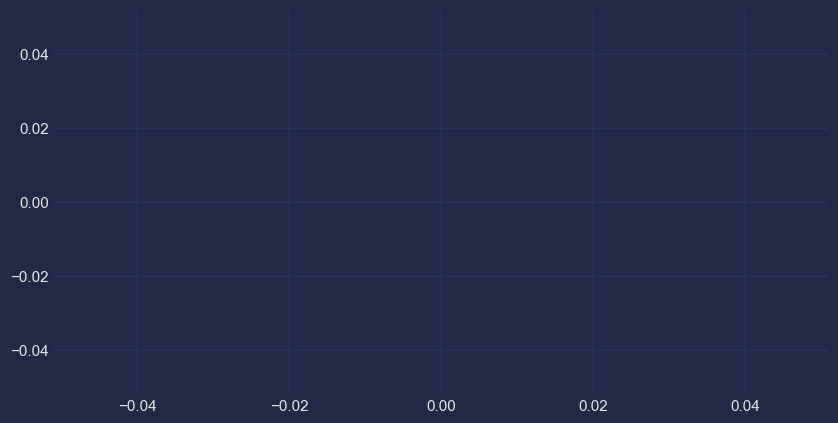

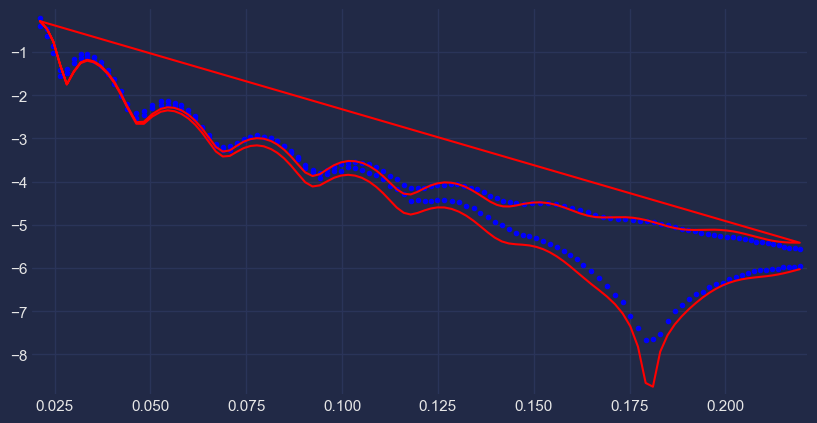

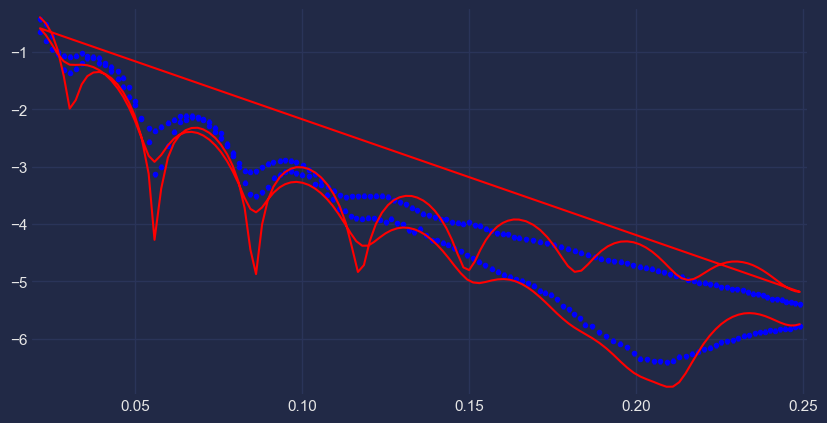

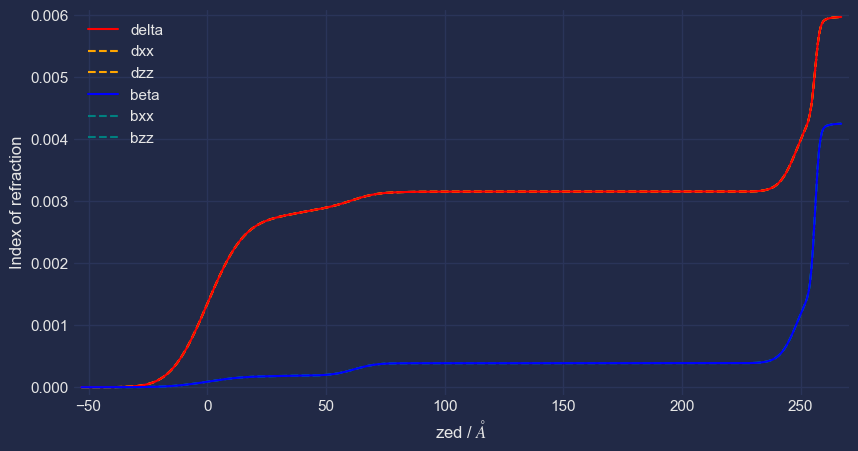

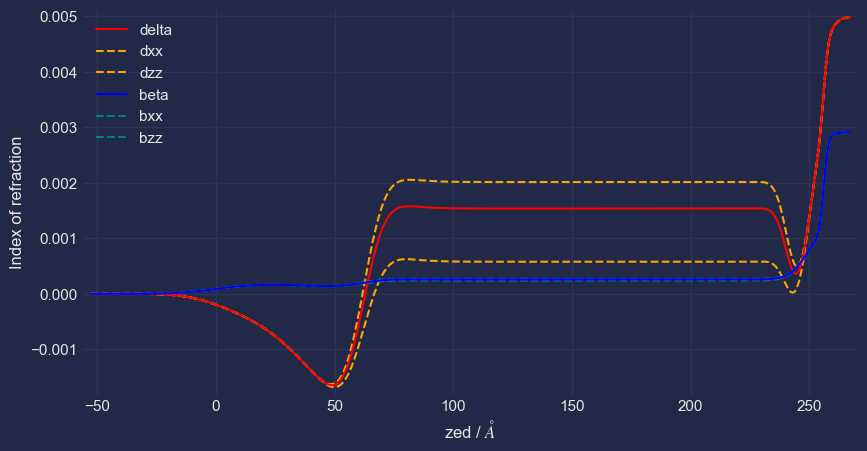

In [75]:
fitter = CurveFitter(global_obj, nwalkers=nwalkers, moves=move)
fitter.initialise("jitter")
chain = fitter.sample(int(nsamples), random_state=random_state)
lp = fitter.logpost
plt.plot(-lp)

print(global_obj.varying_parameters())

objective[0].plot()
objective[1].plot()

struct[0].plot()
struct[1].plot()

Error plotting BareSi 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 283.7 100
Error plotting C60-ZnPc 284.0 100


KeyboardInterrupt: 

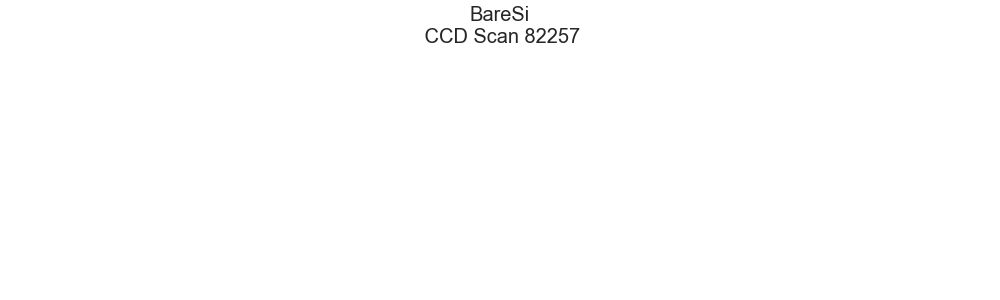

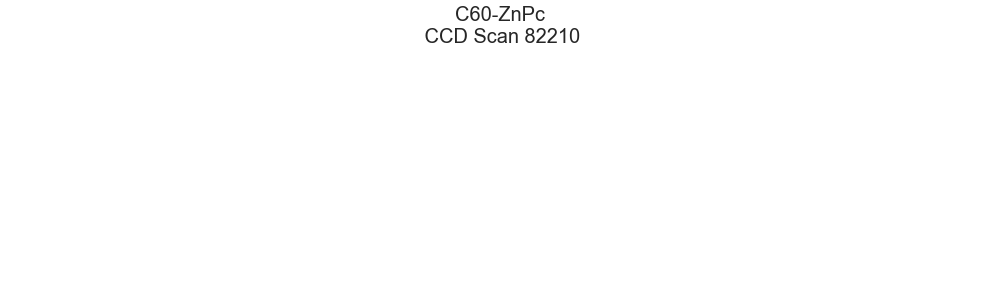

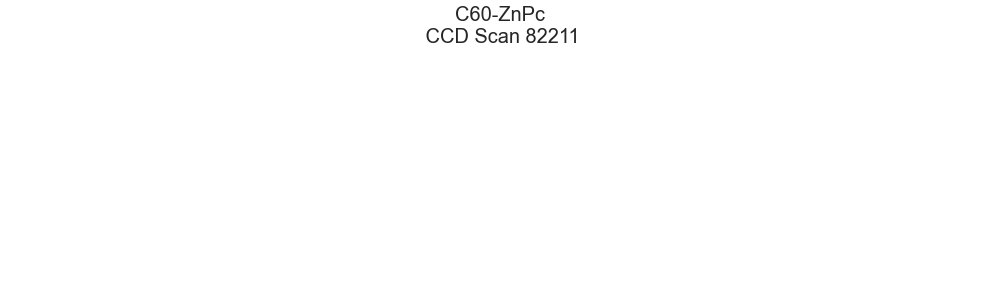

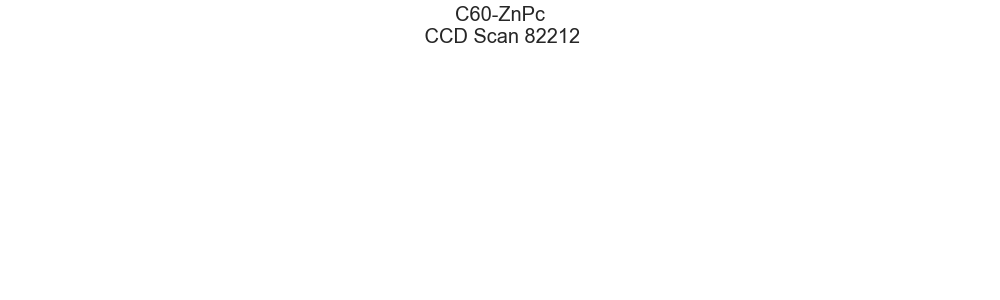

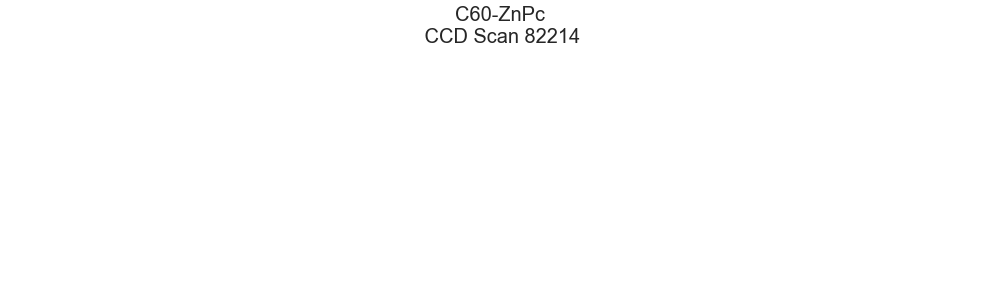

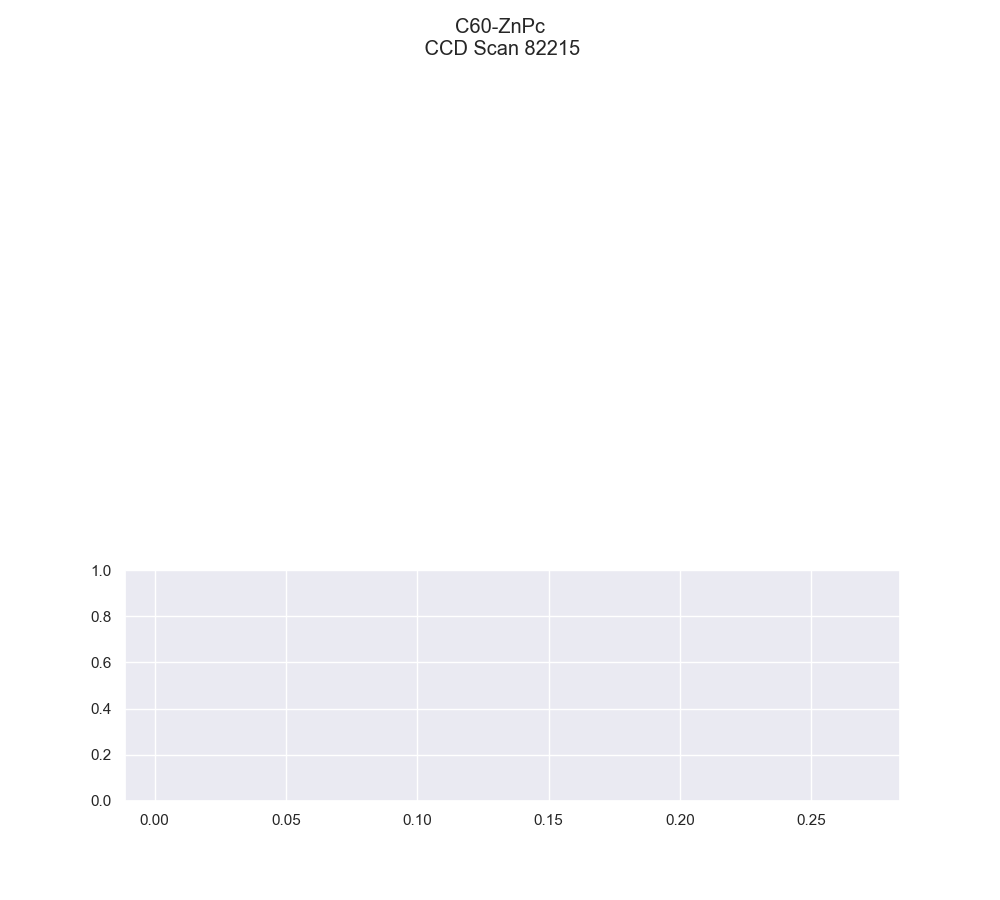

In [ ]:
# def plot_sample(sample_path):
#     for scan in sample_path.iterdir():
#         if not scan.is_dir():
#             continue
#         energies = [en for en in scan.iterdir() if en.is_dir()]
#         fig, ax = plt.subplots(
#             nrows=len(energies),
#             figsize=(10, 3 * len(energies)),
#             sharex=True,
#             gridspec_kw={"wspace": 0, "hspace": 0},
#         )
#         fig.suptitle(f"{sample_path.stem}\n {scan.stem}")
#         for i, en in enumerate(energies):
#             if not en.is_dir():
#                 continue
#             for pol in en.iterdir():
#                 if not pol.is_dir():
#                     continue
#                 if isinstance(ax, np.ndarray):
#                     axes = ax[i]
#                 else:
#                     axes = ax
#                 try:
#                     xrr = ru.Refl(path=pol)
#                     xrr.plot(ax=axes, label=f"{en.name} {pol.stem}")
#                     xrr.to_parquet()
#                     xrr.to_csv()
#                 except Exception as e:
#                     print(f"Error plotting {sample_path.stem} {en.name} {pol.stem}")
#                     axes.remove()


# import warnings

# warnings.filterwarnings("ignore")


# # FILEPATH: /c:/Users/Harlan Heilman/CarbonLab/Refl-Utils/src/RoomTempFitting.ipynb
# def plot_bt():
#     processed_path = ru.FileDialog.getDirectory(title="Select Processed Directory")
#     samples = [s for s in processed_path.iterdir() if s.is_dir()]
#     for sample in samples:
#         plot_sample(sample)


# plot_bt()